In [1]:
import numpy as np
import pandas as pd
import matplotlib
from tqdm import tqdm 
from sklearn import metrics 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from scipy.stats import  kurtosis

# styling:
import seaborn as sns
plt.style.use(['ggplot'])
sns.set_palette("deep")

matplotlib.rcParams["figure.dpi"] = 300


/home/icy/miniconda3/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
all_dir = [x[0] for x in os.walk('.')]
set_dirs = []
for dir in all_dir:
    if len(dir.split('/')) == 3:
        set_dirs.append(dir)
set_dirs.sort()

In [3]:
# Ensemble data set up
# algo_names = ['op', 'inf', 'grnboost', 'genie3', 'grisli', 'grnvbem', 'leap',  'pidc', 'ppcor', 'scode', 'scribe', 'sincerities', 'ss_cor', 'ss_ranked']
algo_names = ['op', 'inf', 'grnboost', 'genie3', 'grisli', 'grnvbem', 'leap',  'pidc', 'ppcor', 'scode', 'scribe', 'ss_cor', 'ss_ranked']
min_max_scaler = preprocessing.MinMaxScaler()

In [4]:
ensemble_df = pd.read_csv(set_dirs[0] + '/ensemble.csv')
all_data = pd.DataFrame(columns=ensemble_df.columns)

tf_set = np.array(['G'+str(i) for i in range(1,101)])
np.random.seed(4)
np.random.shuffle(tf_set)
train_tf_list = tf_set[:66]
test_tf_list = tf_set[20:40]

tf_set = np.array(['G'+str(i) for i in range(1,51)])
np.random.seed(4)
np.random.shuffle(tf_set)
train_tf_list_s = tf_set[:33]
test_tf_list_s = tf_set[10:20]



In [5]:

ensemble_df_list = []
train_df_list = []


for set_dir in set_dirs:
    train_ind = []
    test_ind = []
    ensemble_df = pd.read_csv(set_dir + '/ensemble.csv')
    ensemble_df = ensemble_df.replace(np.nan,0)
    # ensemble_df = ensemble_df.drop(columns=['singe'])
    for index, row in ensemble_df.iterrows():
        tf_name = row['edge_name'].split('_')[0]
        if (len(ensemble_df) < 5000):
            if (tf_name in train_tf_list_s):
                train_ind.append(index)
            if (tf_name in test_tf_list_s):
                test_ind.append(index)
        else:
            if (tf_name in train_tf_list):
                train_ind.append(index)
            if (tf_name in test_tf_list):
                test_ind.append(index)
    test_df = ensemble_df.loc[test_ind]
    train_df = ensemble_df.loc[train_ind]
    # ensemble_df = ensemble_df.drop(train_ind+test_ind)
    # ensemble_df = ensemble_df.drop(test_ind)
    ensemble_df = ensemble_df.drop(train_ind)
    all_data = pd.concat([all_data, test_df])
    train_df_list.append(train_df)
    ensemble_df_list.append(ensemble_df)

all_data = all_data.astype({'edge_exist': 'int8'})
all_X = all_data[algo_names] 
# all_X = min_max_scaler.fit_transform(all_X)
all_y = all_data['edge_exist']


In [6]:
set_names =['dream3_100#1', 'dream3_100#2','dream3_100#3','dream3_100#4','dream3_100#5', 'dream4_100#1', 'dream4_100#2','dream4_100#3','dream4_100#4','dream4_100#5']
# algo_print_names = ['OutPredict', 'Inferelator', 'GRNBoost', 'Genie3', 'GRISLI', 'GRNVBEM', 'LEAP',  'PIDC', 'PPCOR', 'SCODE', 'SCRIBE', 'SINCERITIES']
algo_print_names = ['OutPredict', 'Inferelator', 'GRNBoost', 'Genie3', 'GRISLI', 'GRNVBEM', 'LEAP',  'PIDC', 'PPCOR', 'SCODE', 'SCRIBE']
# algo_names = ['op', 'inf', 'grnboost', 'genie3', 'grisli', 'grnvbem', 'leap',  'pidc', 'ppcor', 'scode', 'scribe', 'sincerities']
algo_names = ['op', 'inf', 'grnboost', 'genie3', 'grisli', 'grnvbem', 'leap',  'pidc', 'ppcor', 'scode', 'scribe']


In [7]:
all_train_df = pd.concat(train_df_list)

5.413966191972994


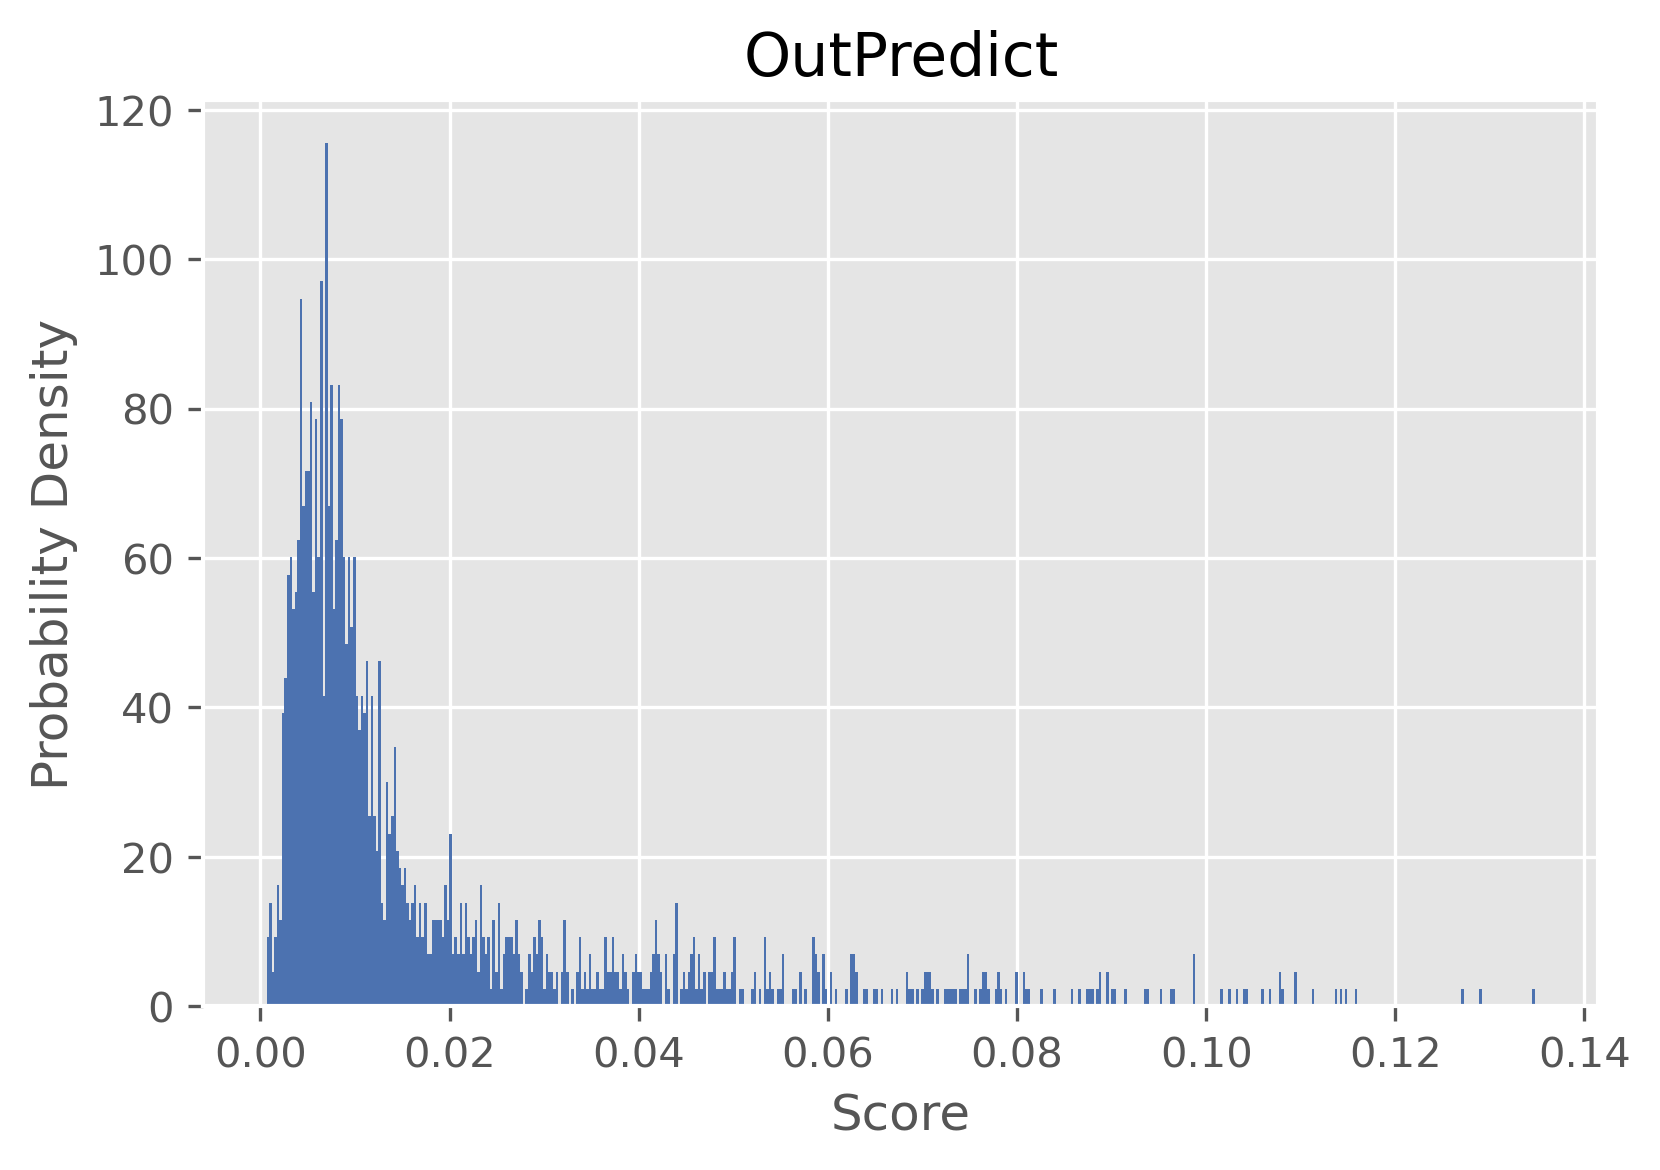

4.646672859743192


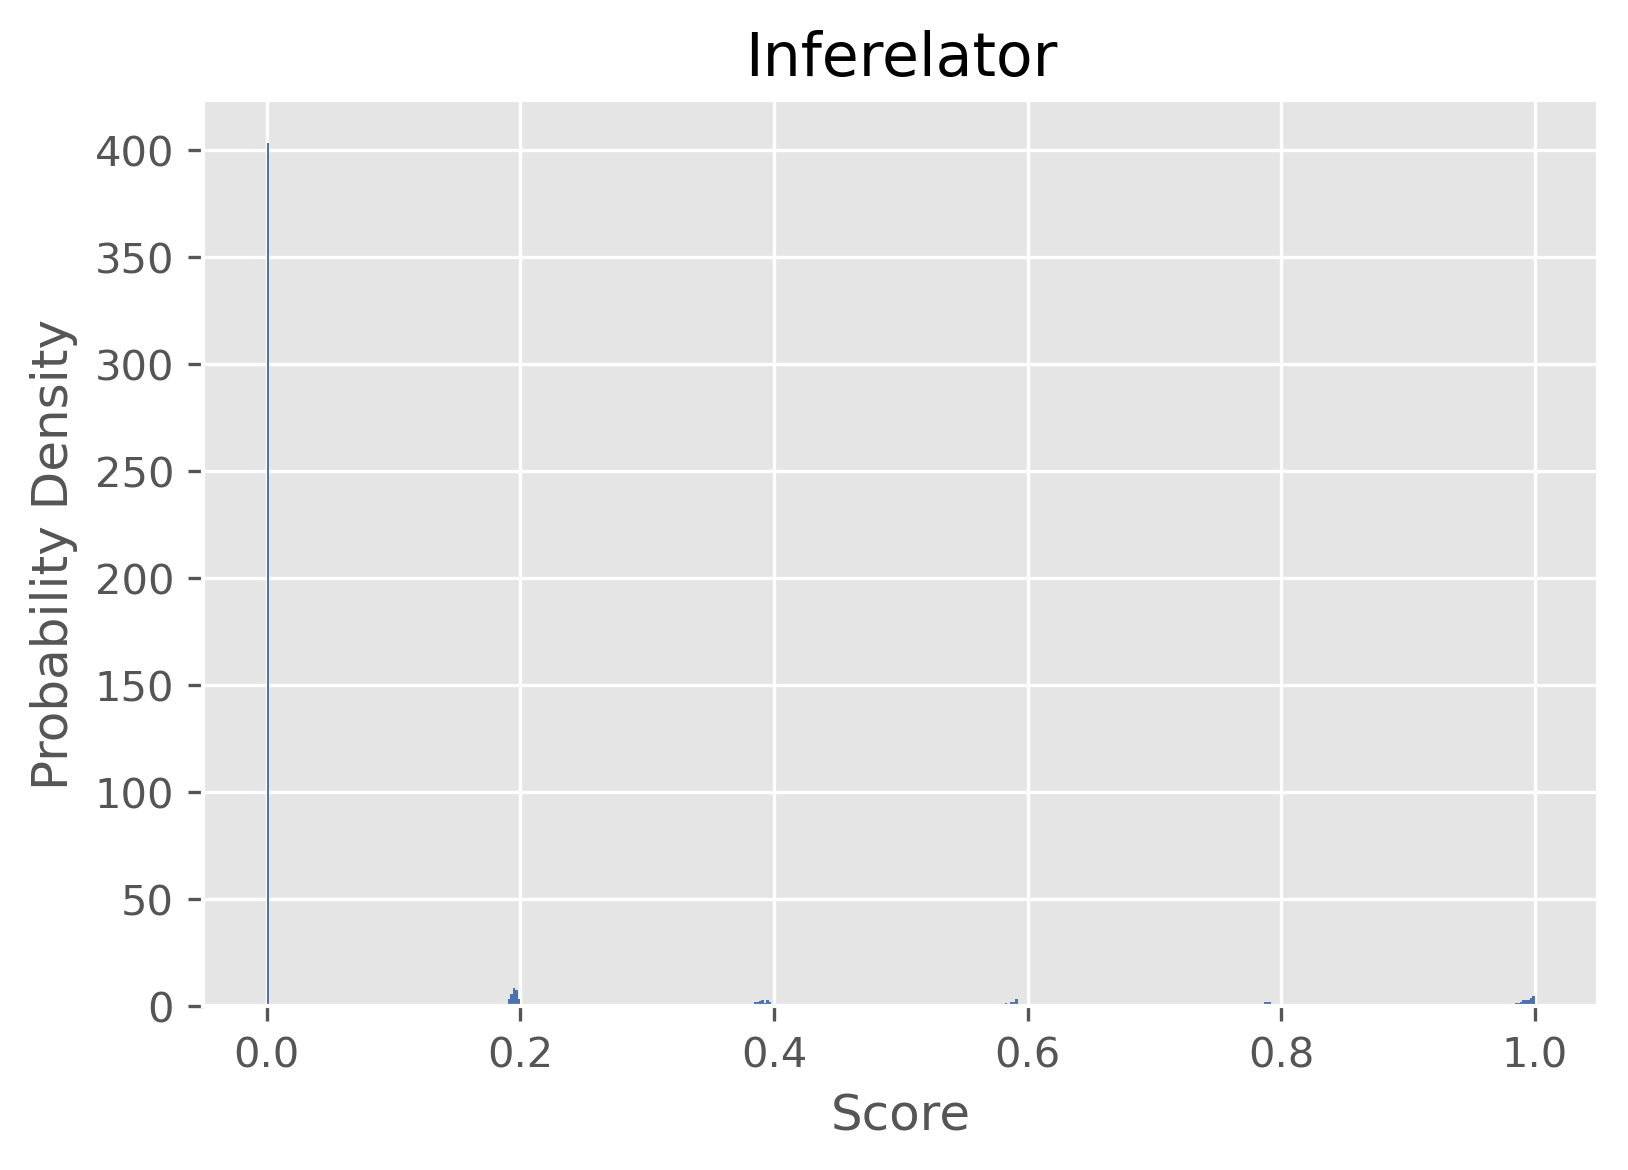

10.400381640608272


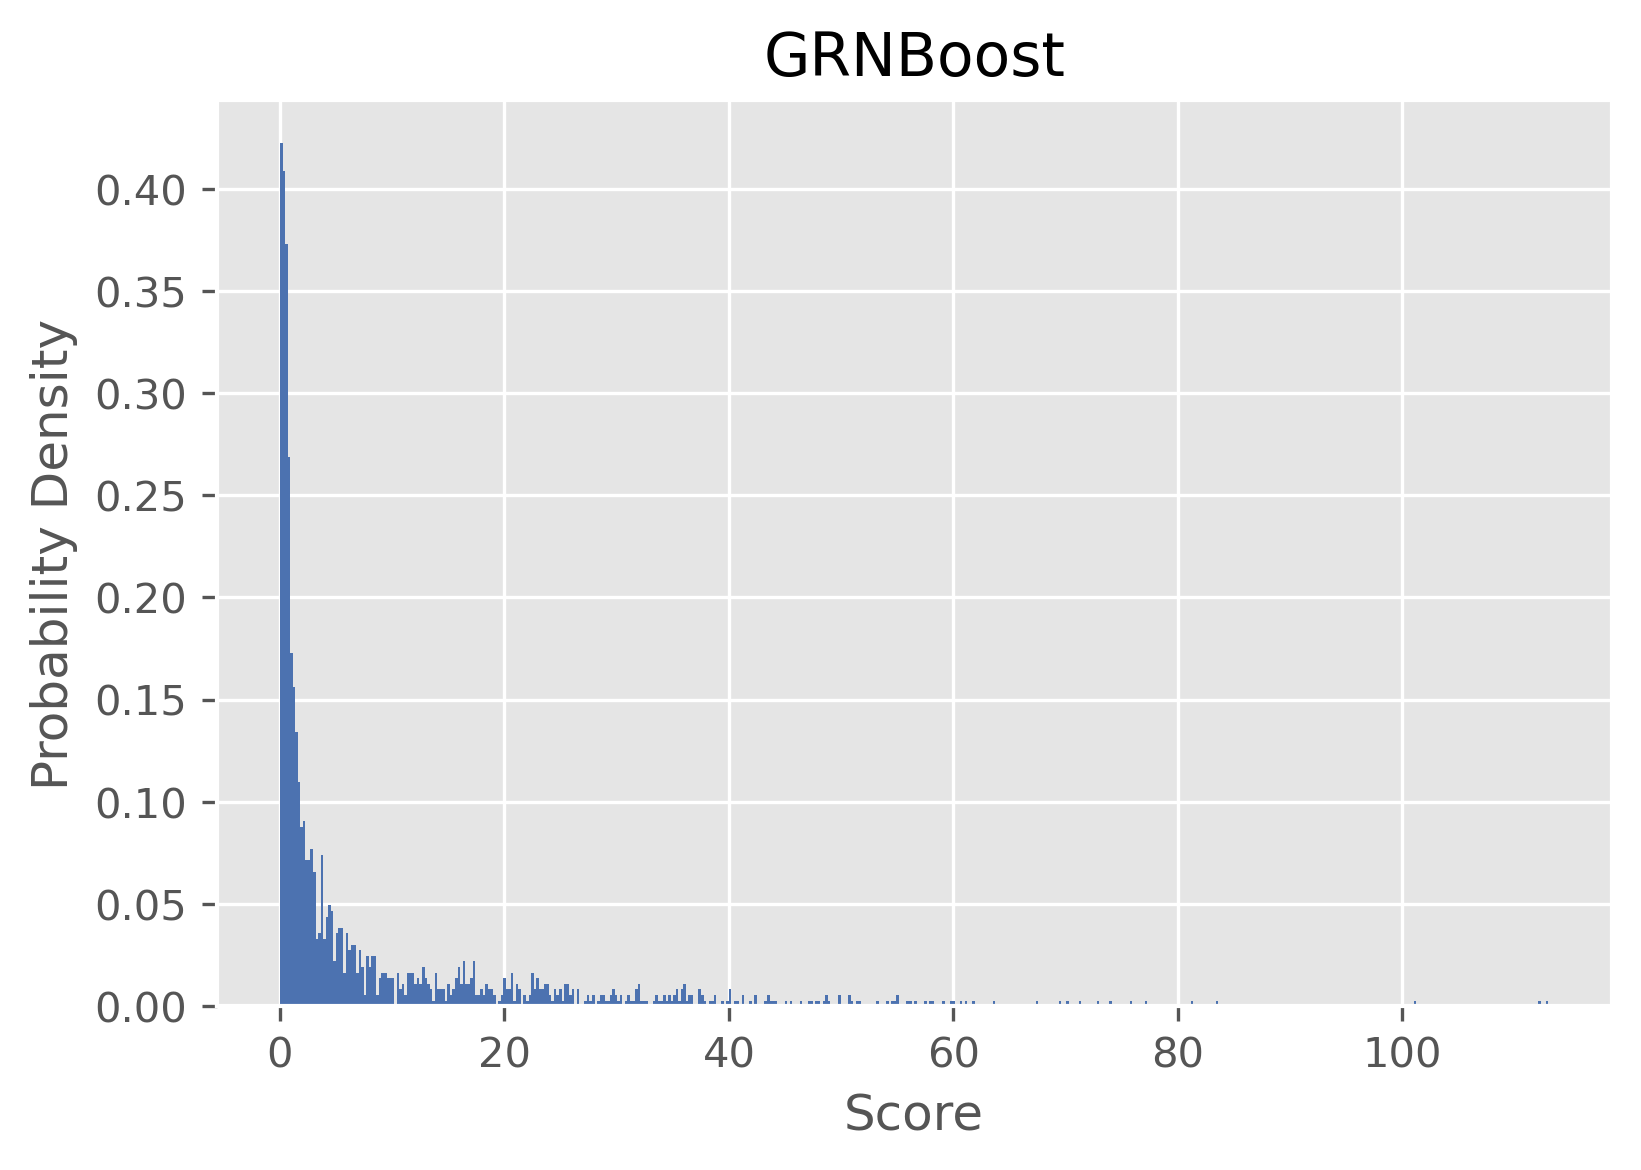

5.431536188669343


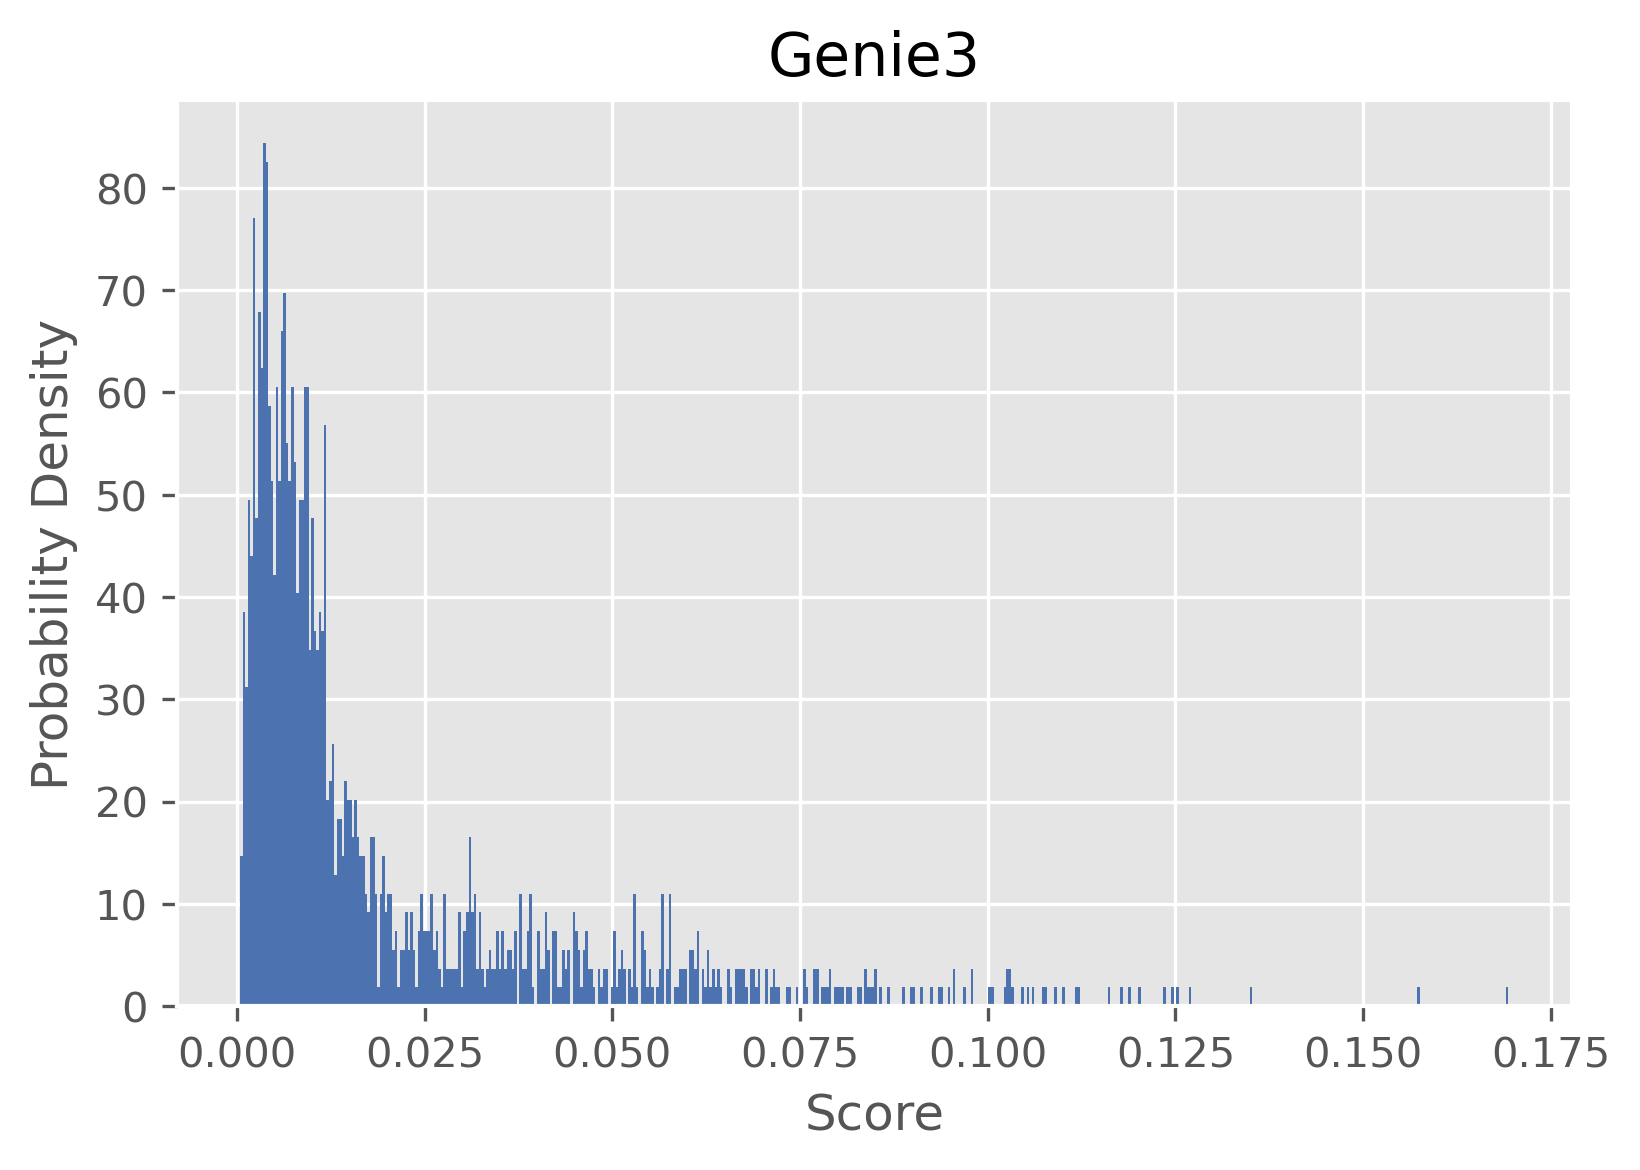

-1.2508340269826945


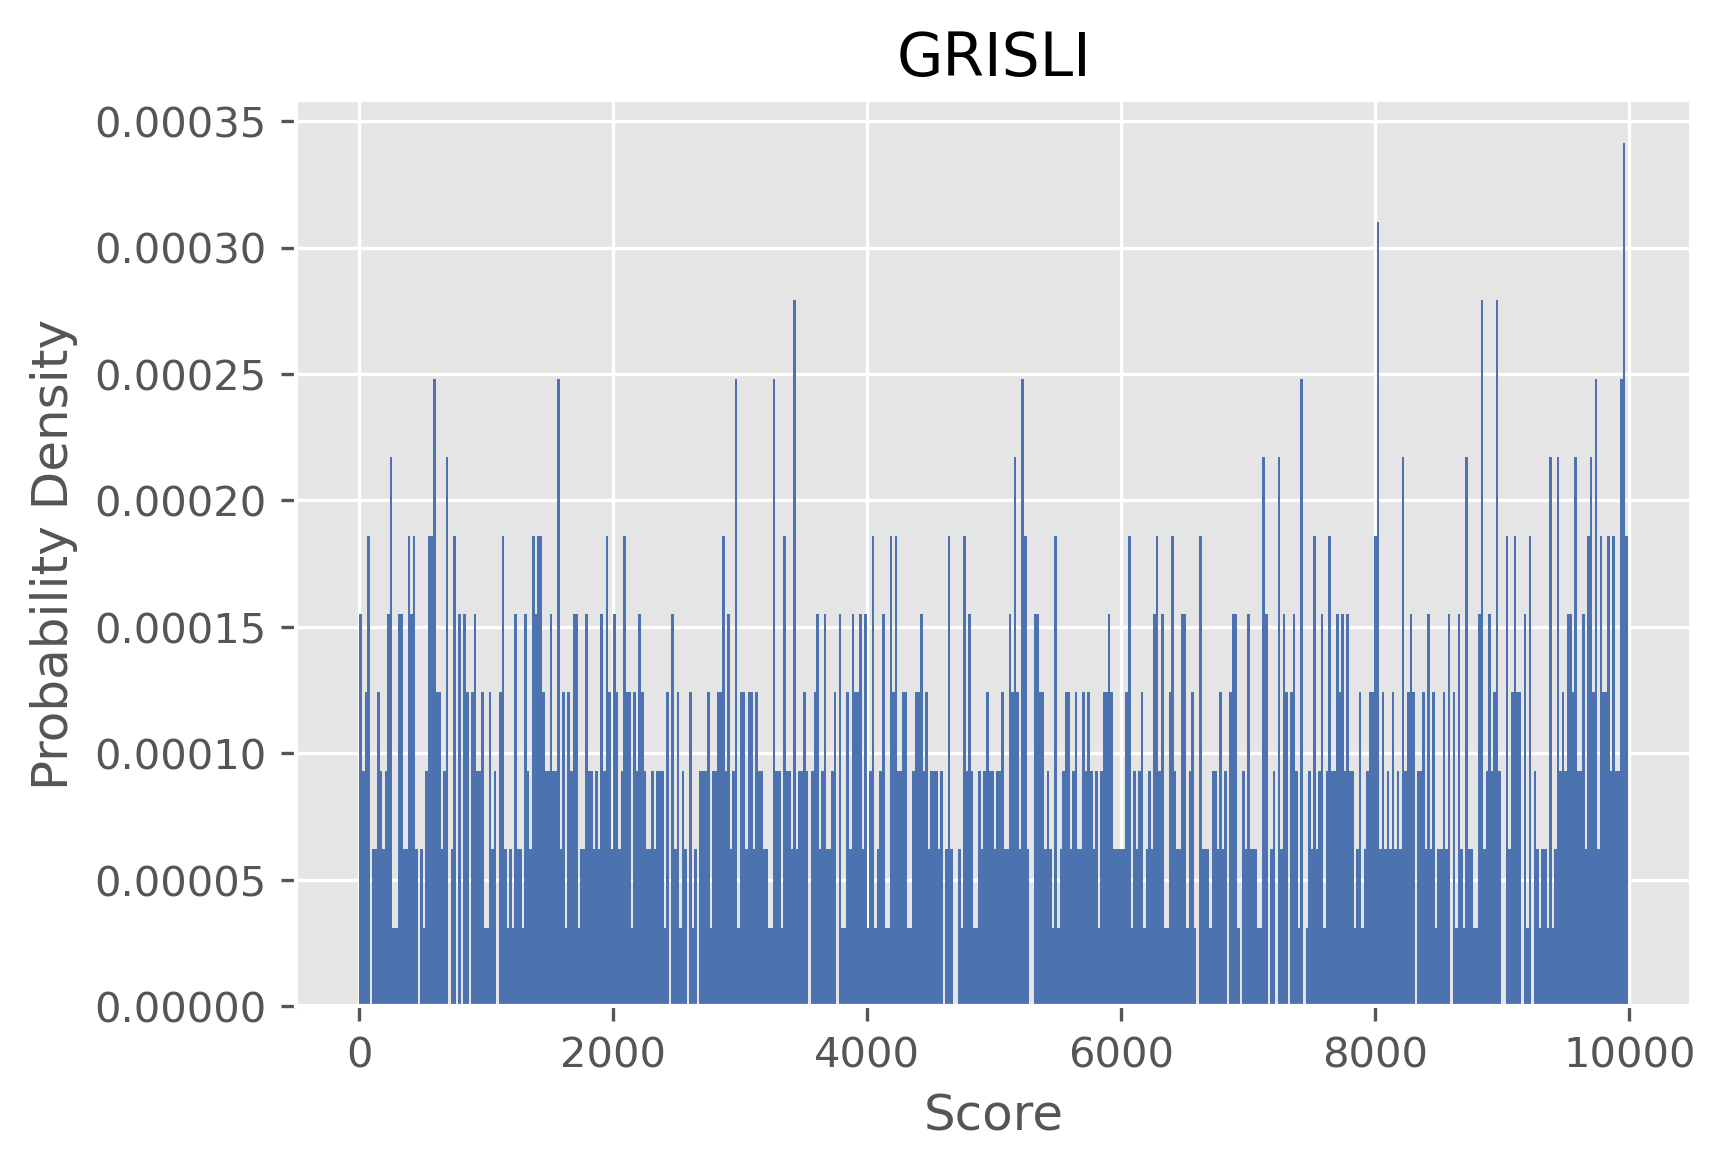

-0.6163243583800142


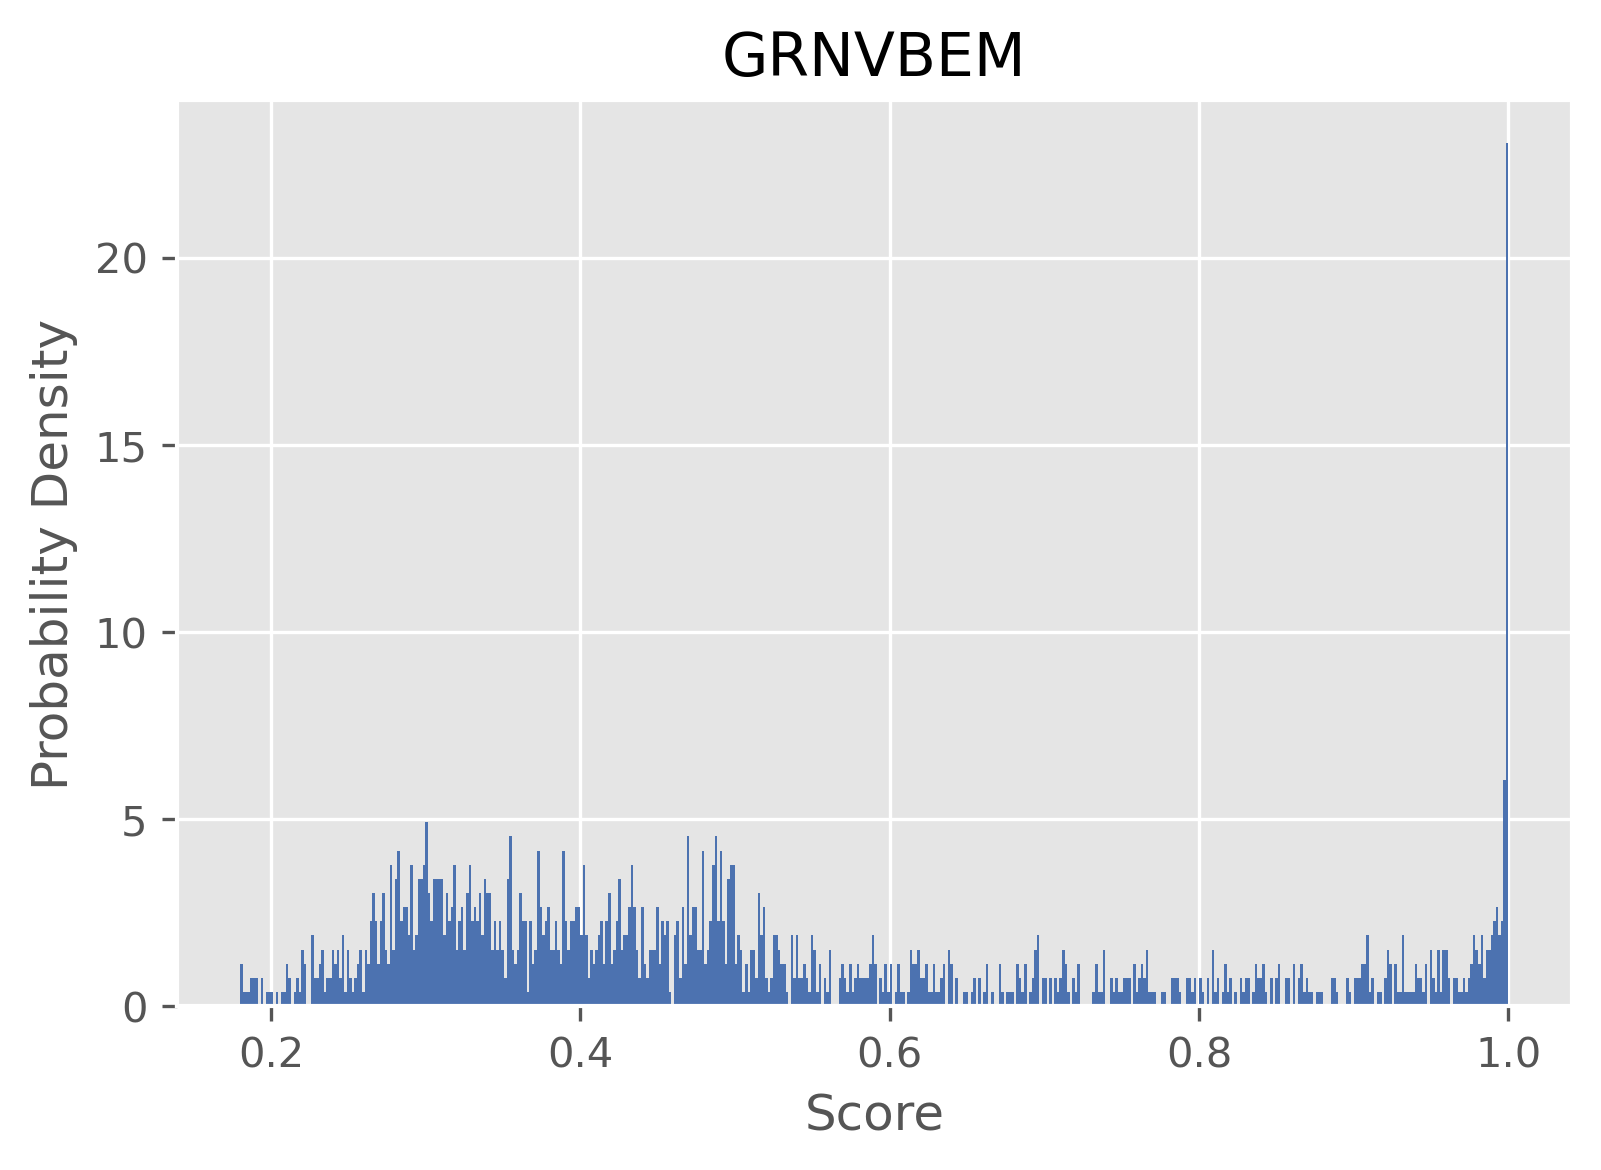

0.6817971085786194


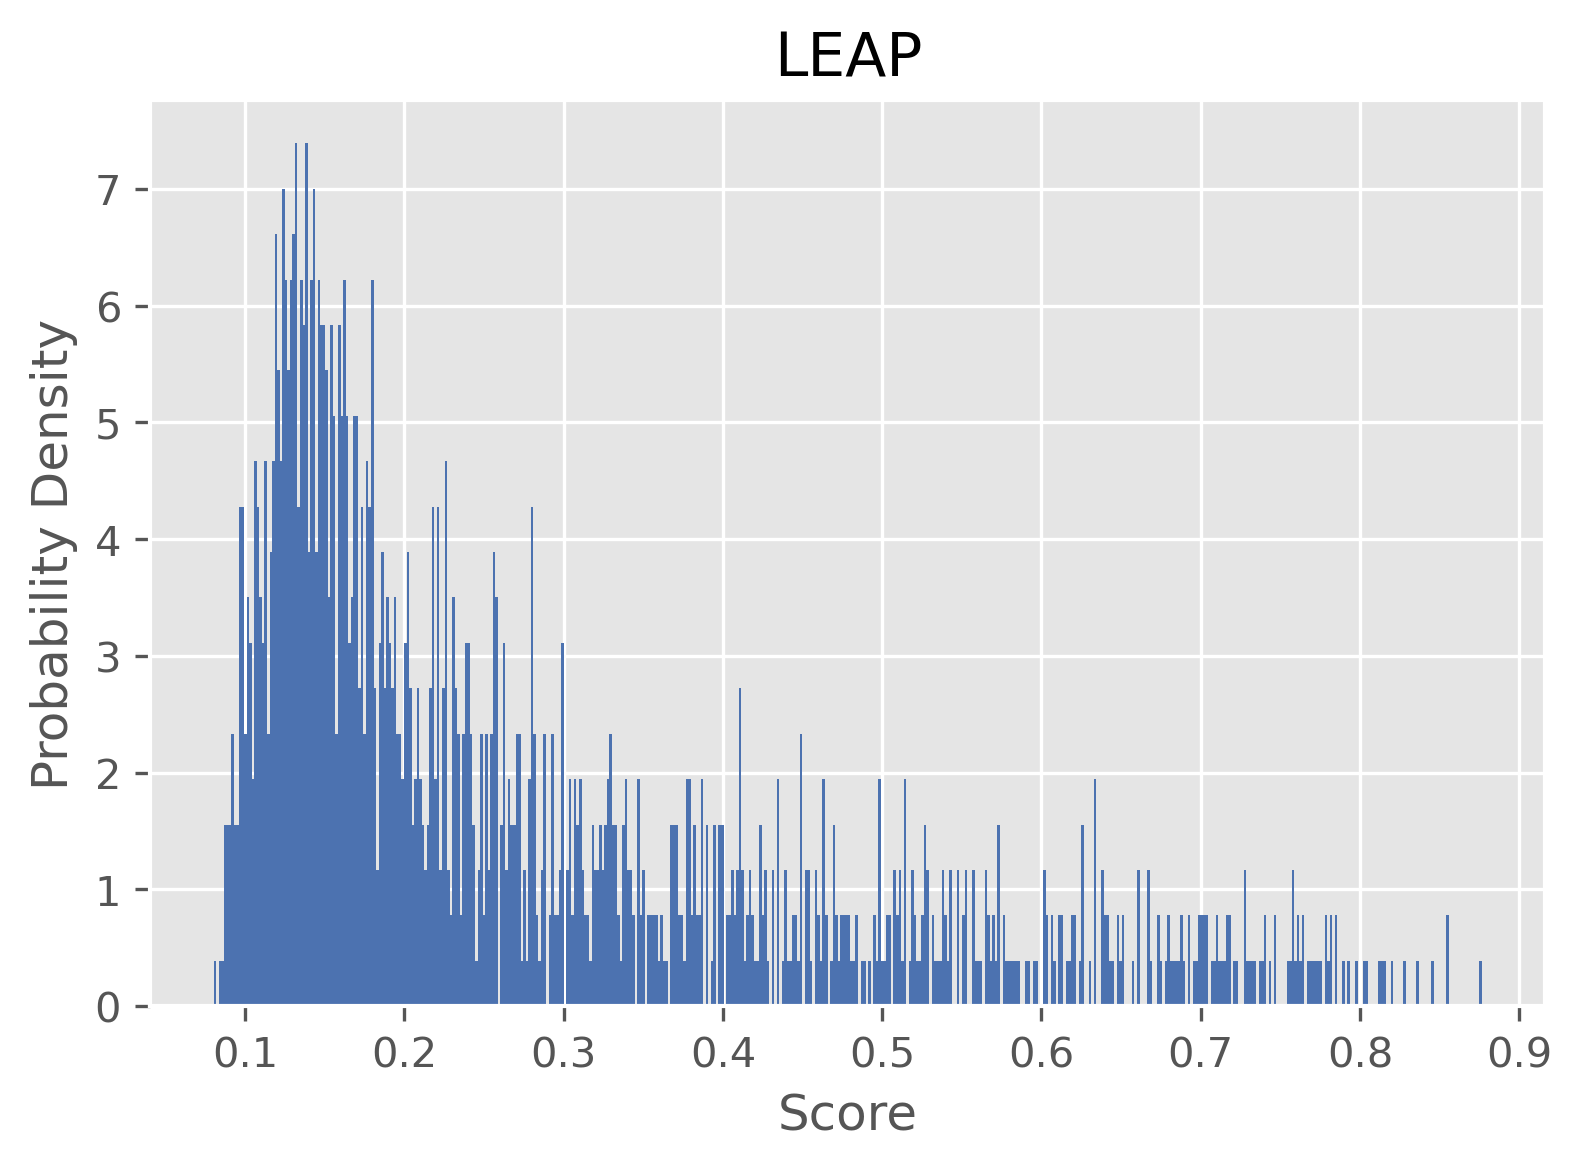

-1.1037370136452245


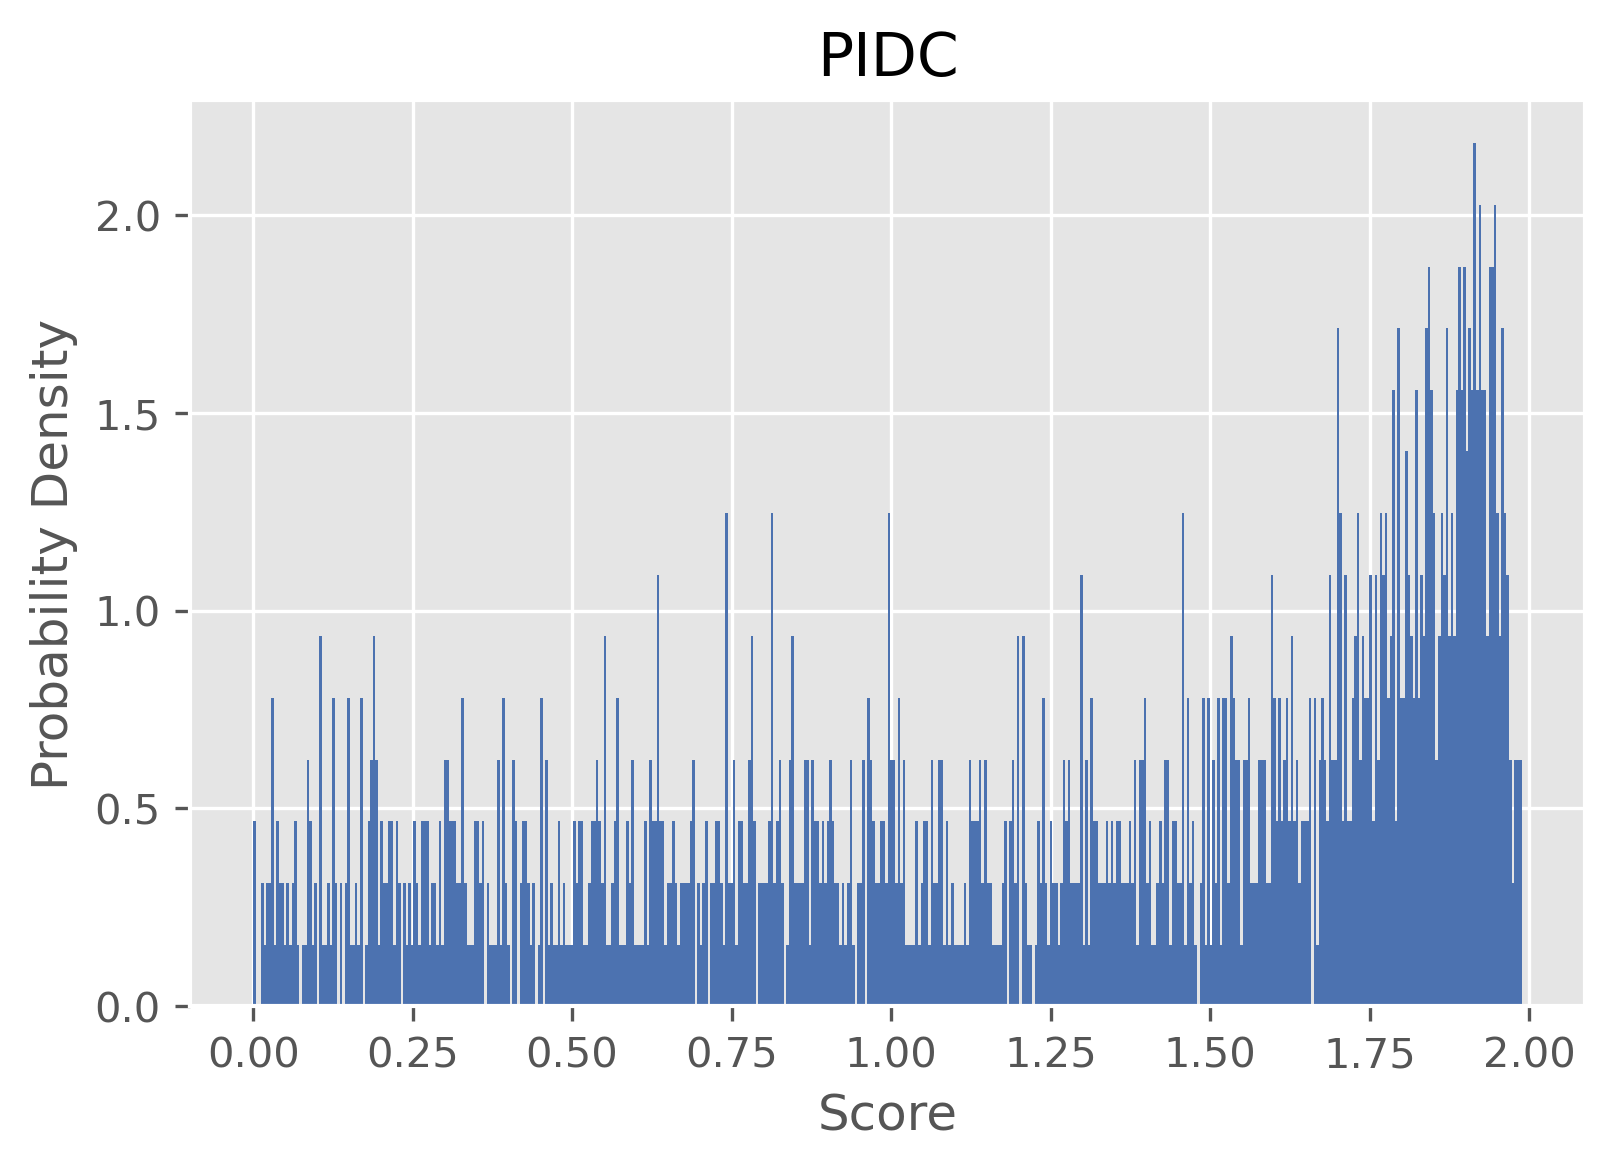

23.131030997633207


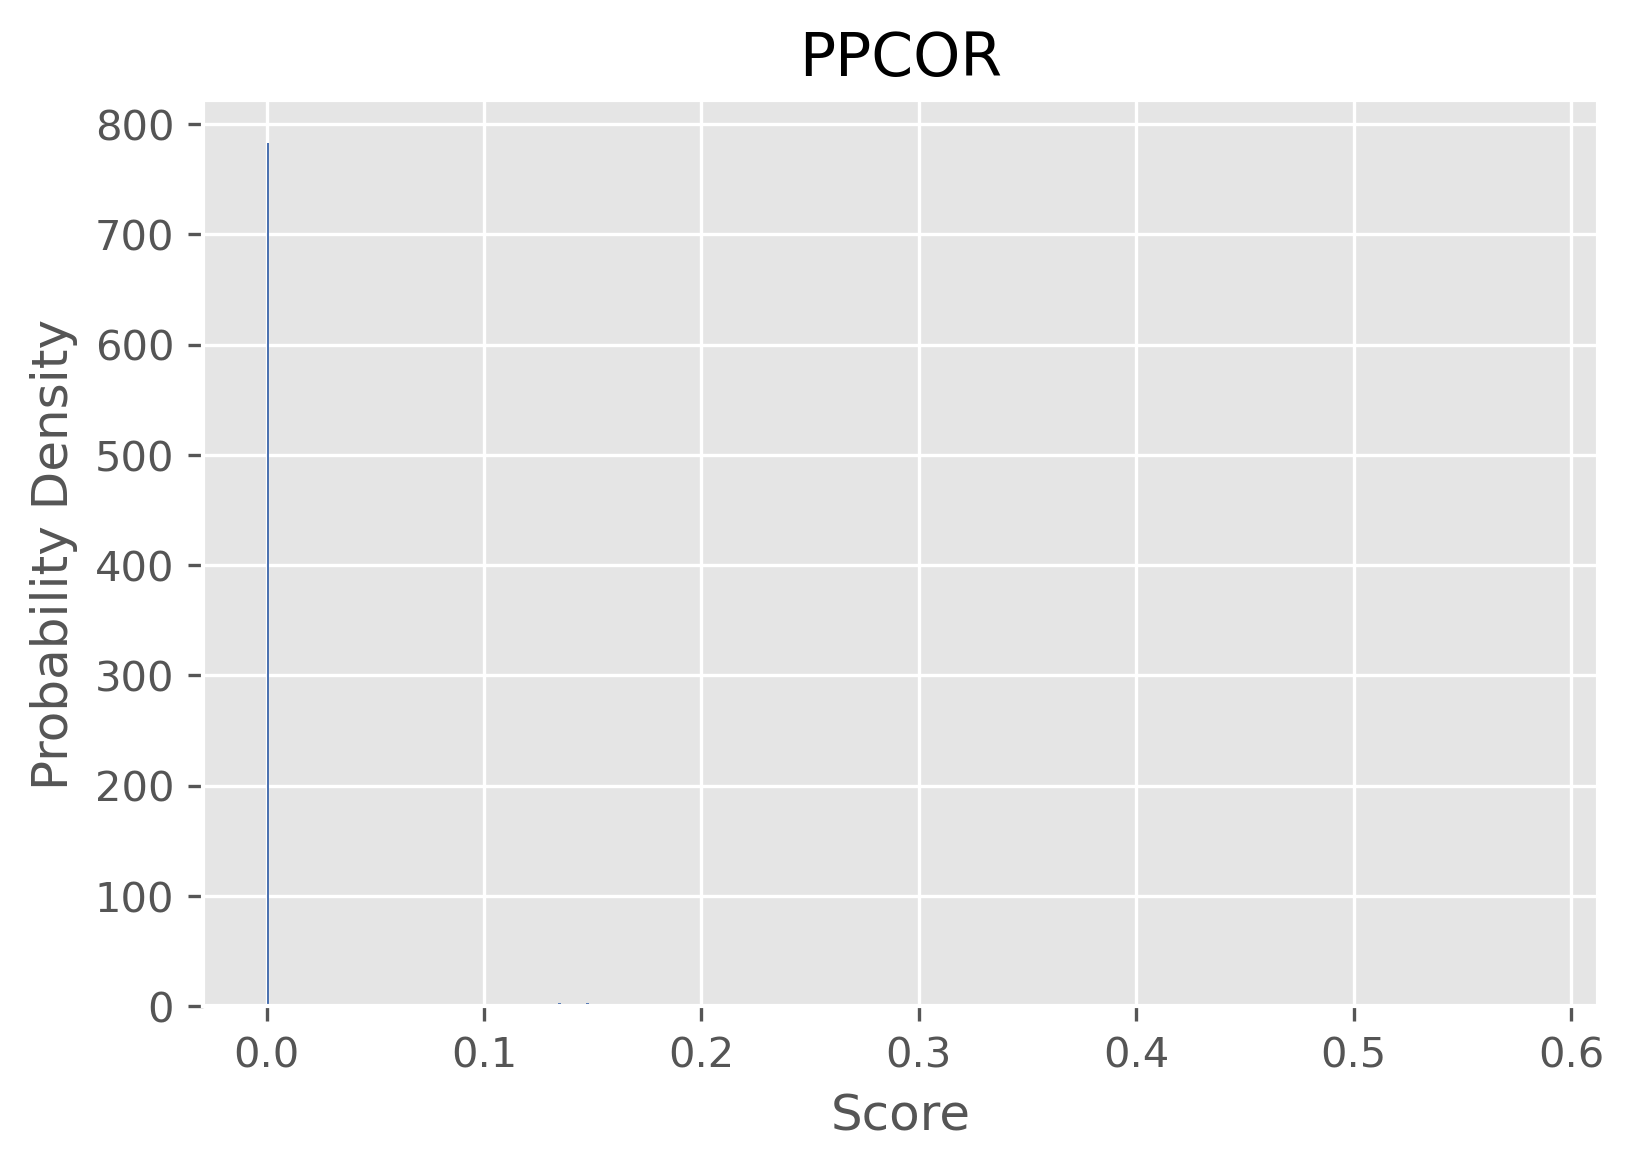

7.4226537940515716


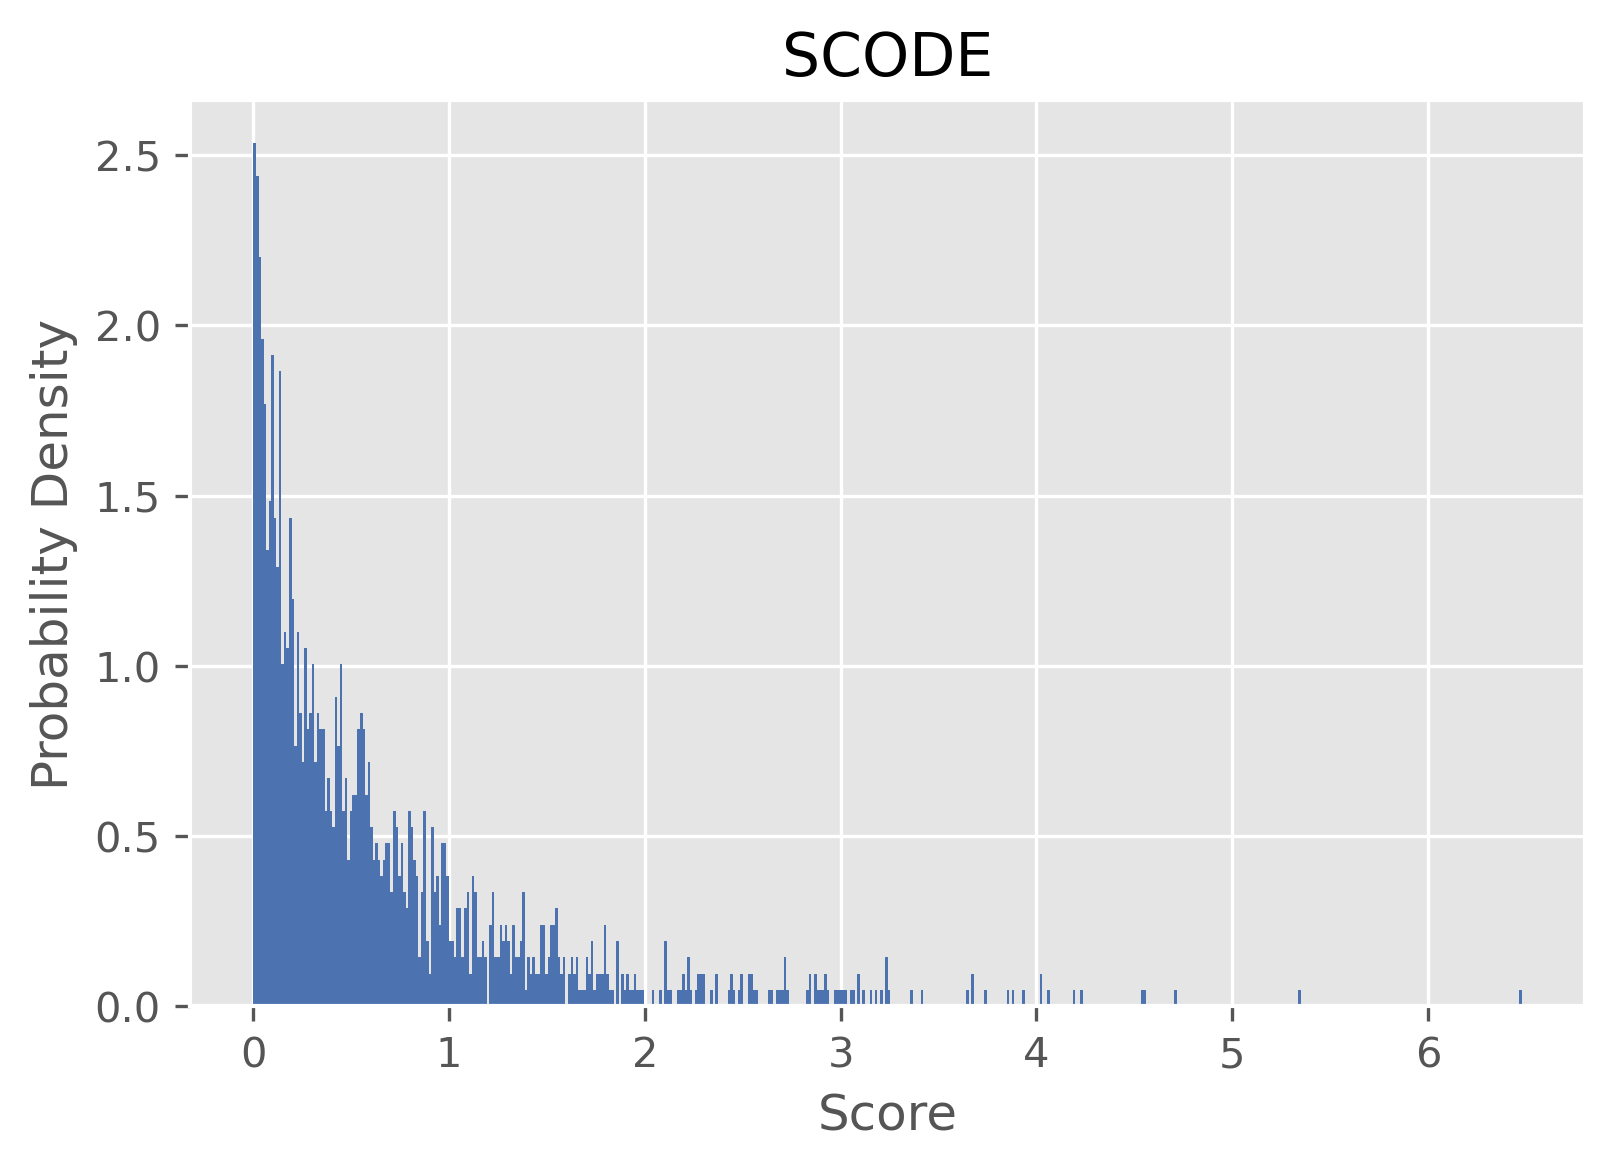

3.9809716107563204


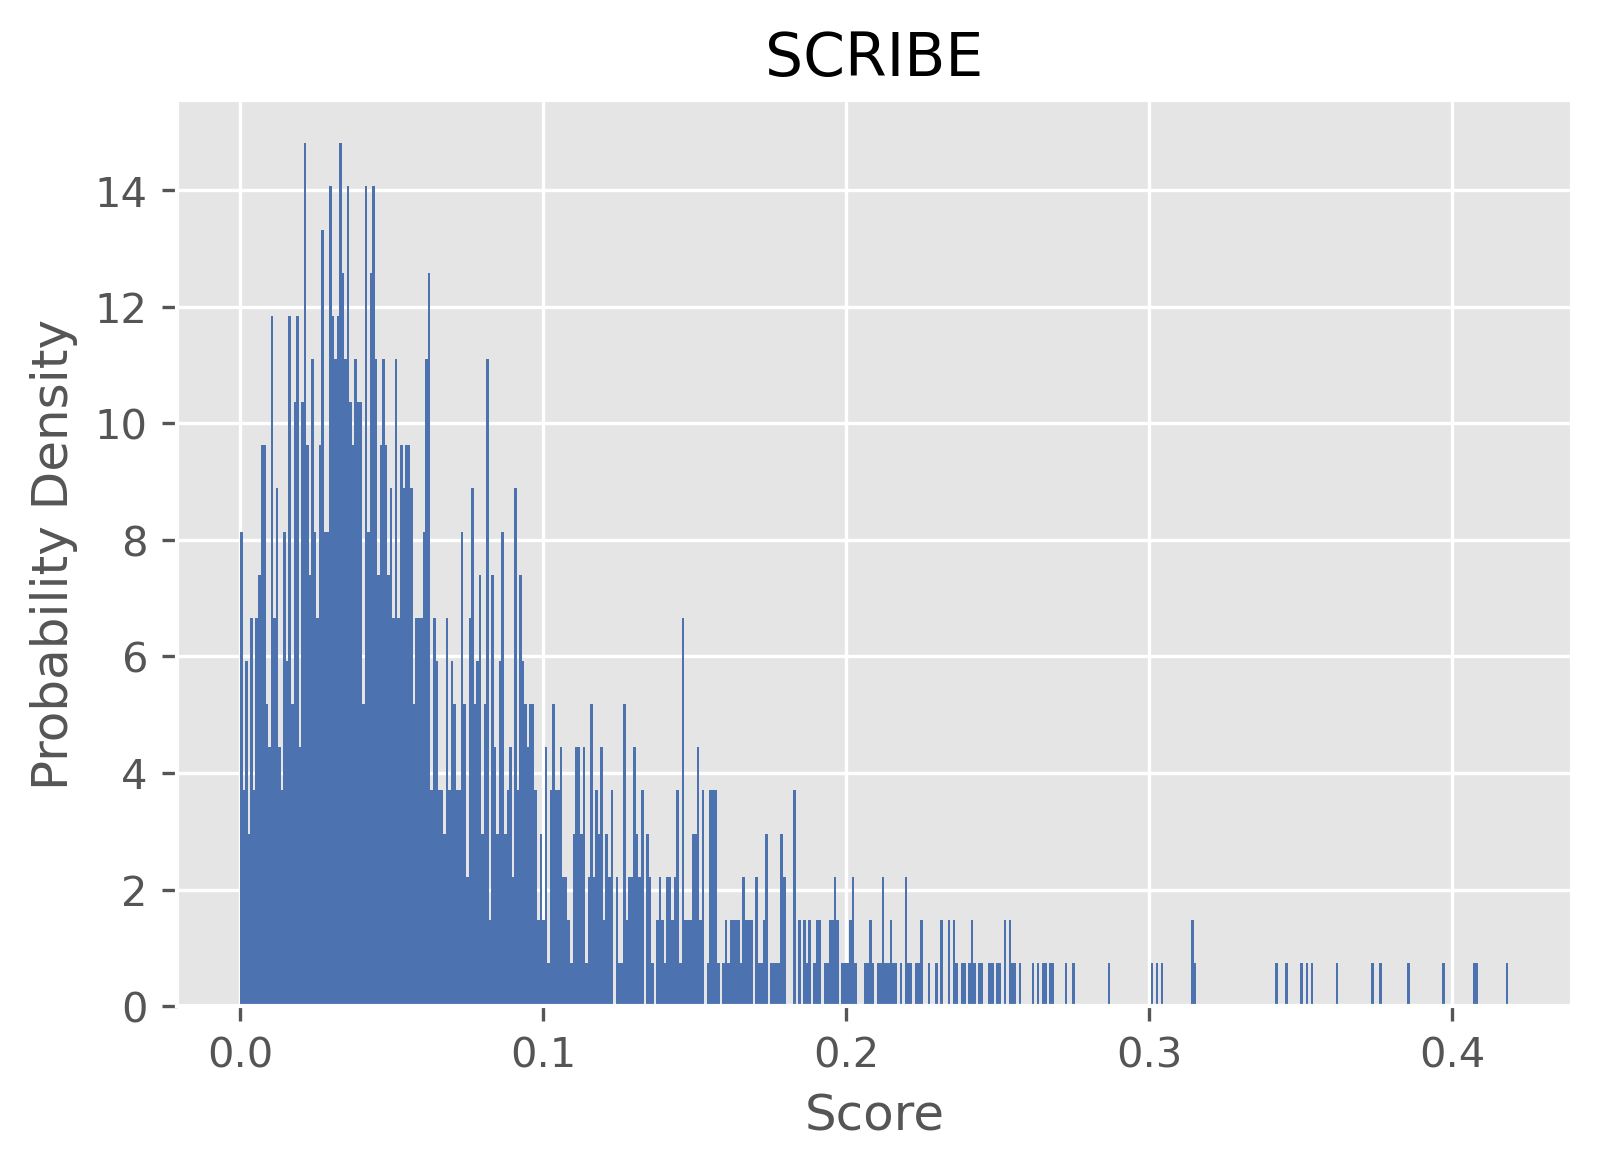

In [8]:
for i, algo in enumerate(algo_names):
    fig, ax = plt.subplots()
    ax.hist(all_train_df[all_train_df['edge_exist']==1][algo], bins=500, density=True, stacked=False)
    plt.xlabel('Score')
    plt.ylabel('Probability Density')
    plt.title(algo_print_names[i])
    # save_path = './pde_hist/' + algo_print_names[i] + '.png'
    print(kurtosis(all_train_df[all_train_df['edge_exist']==1][algo]))
    plt.show()


37.244498970287154


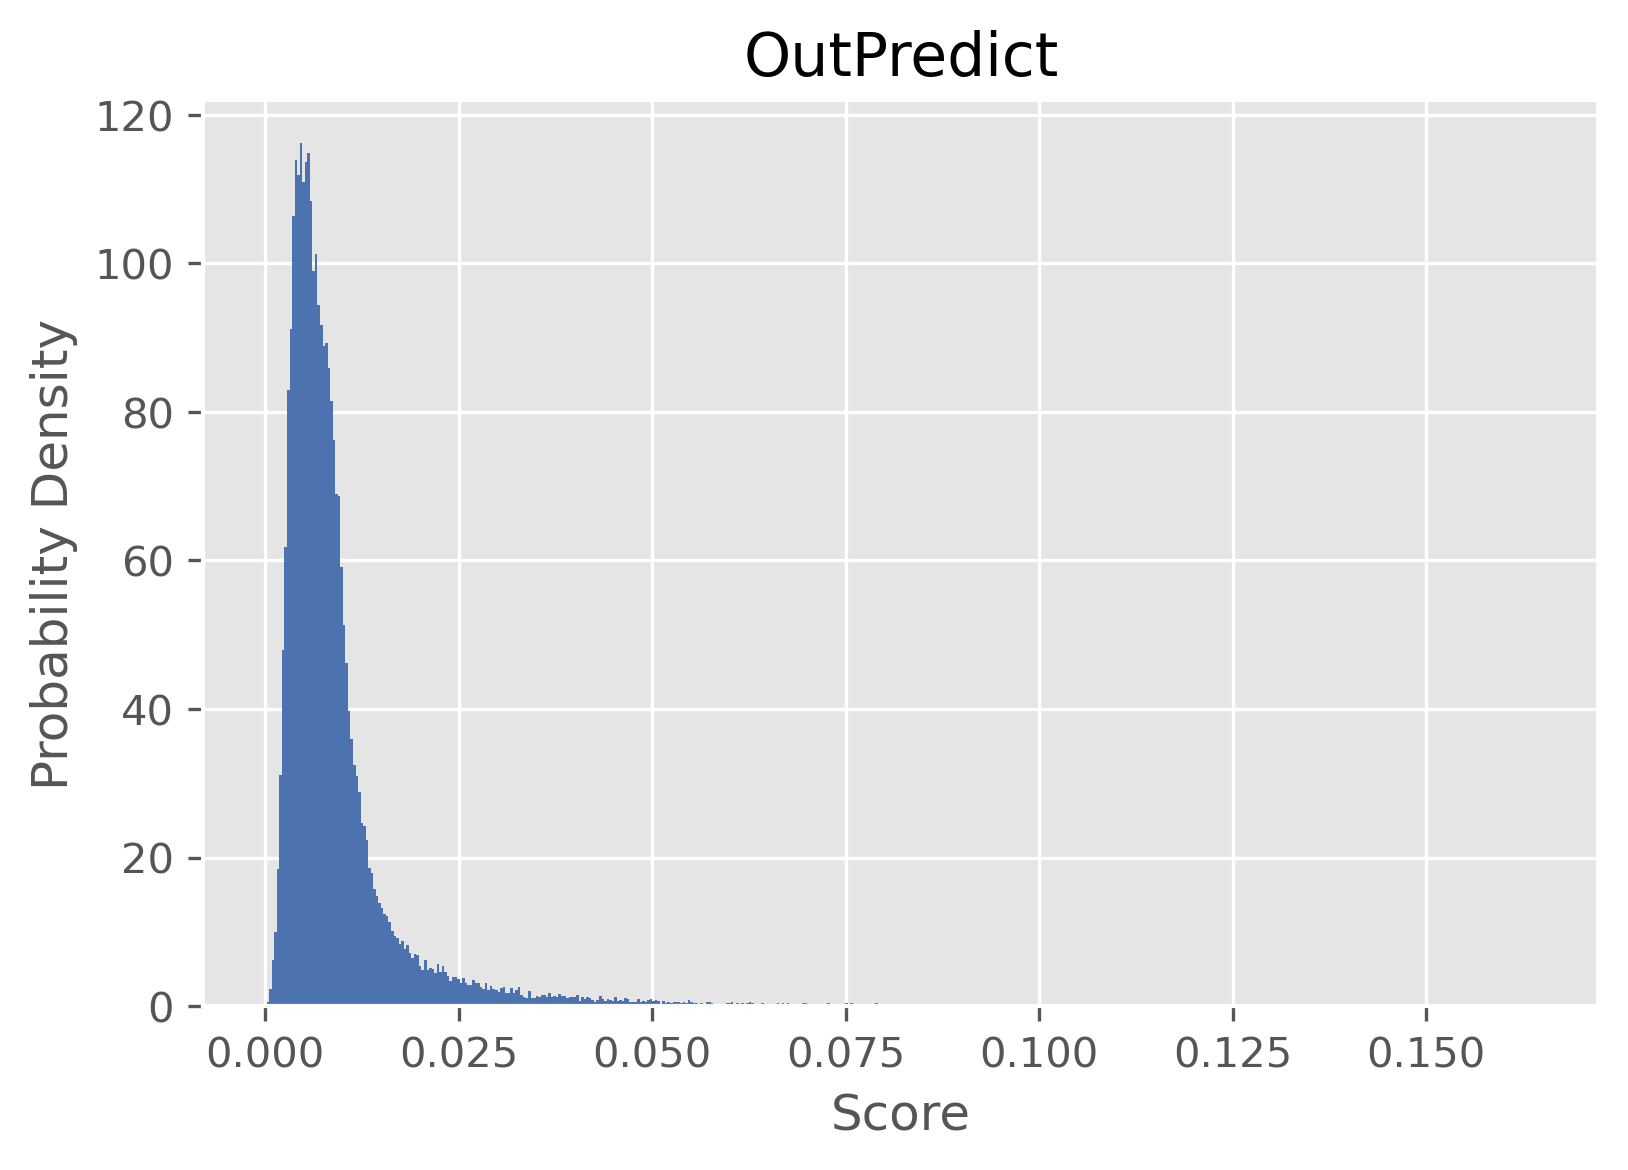

54.15192451161195


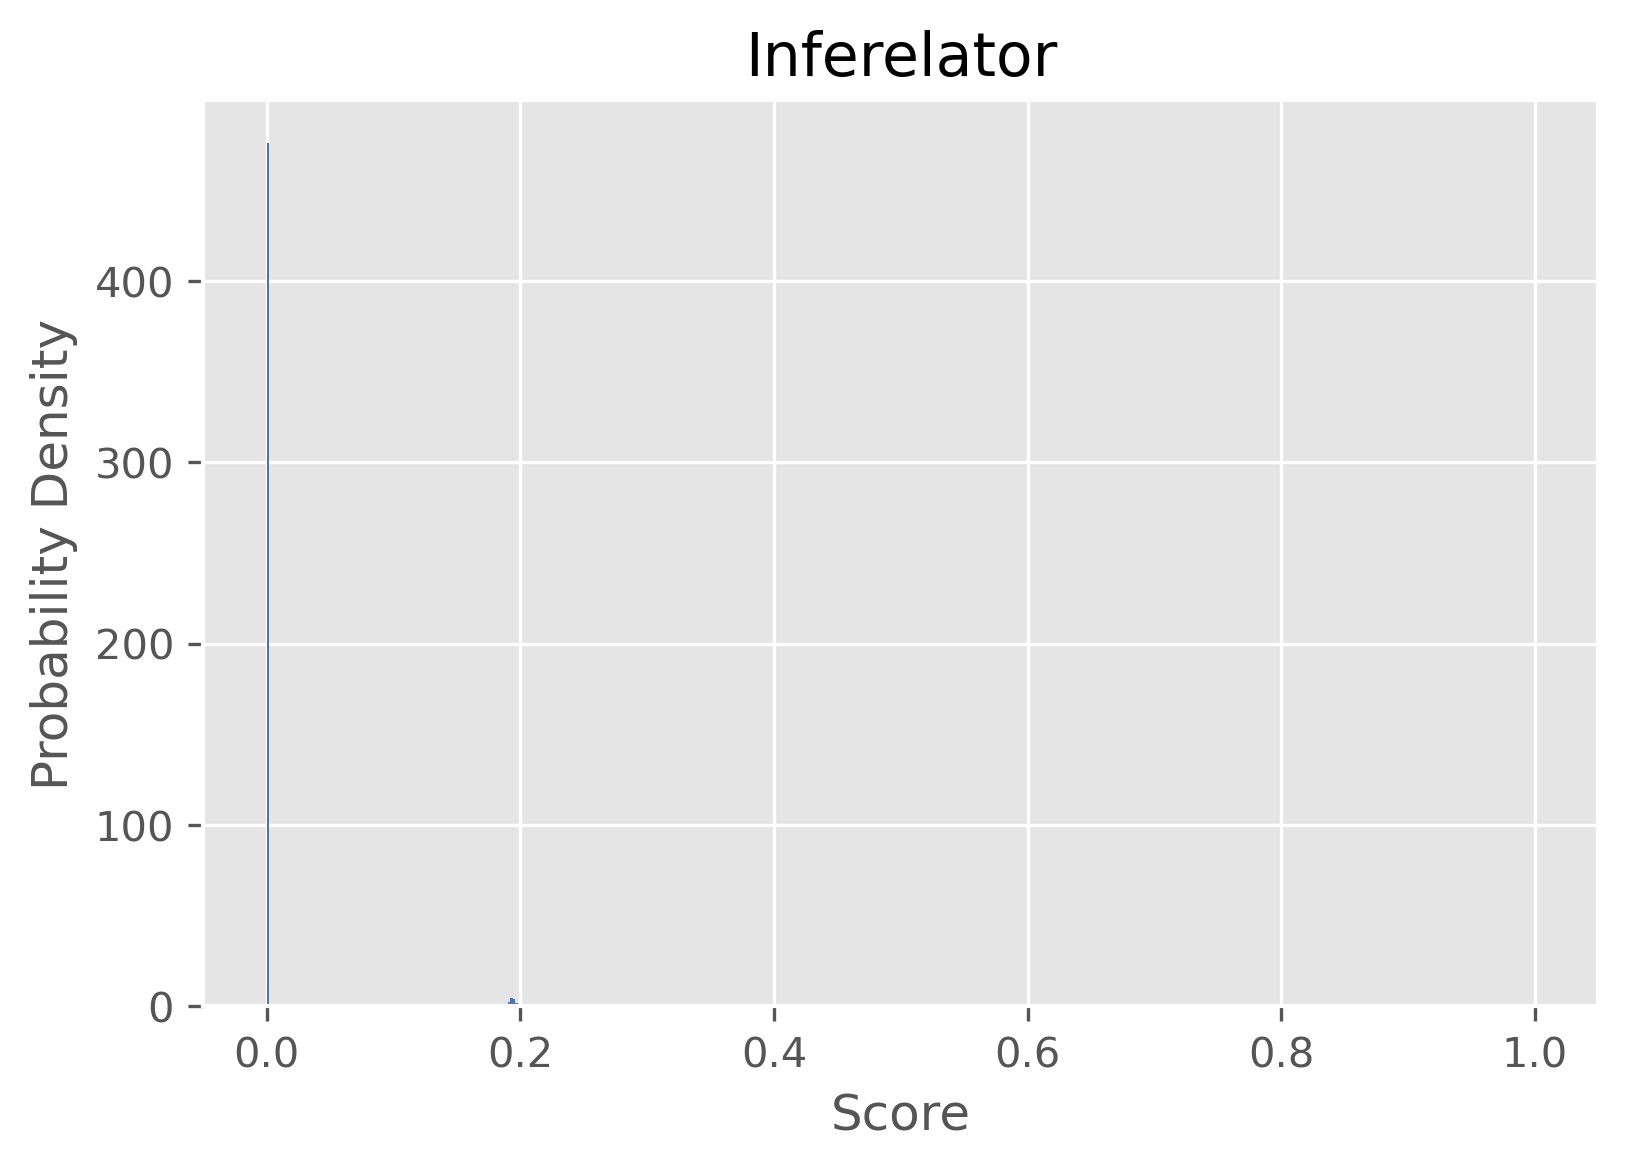

38.51661181376695


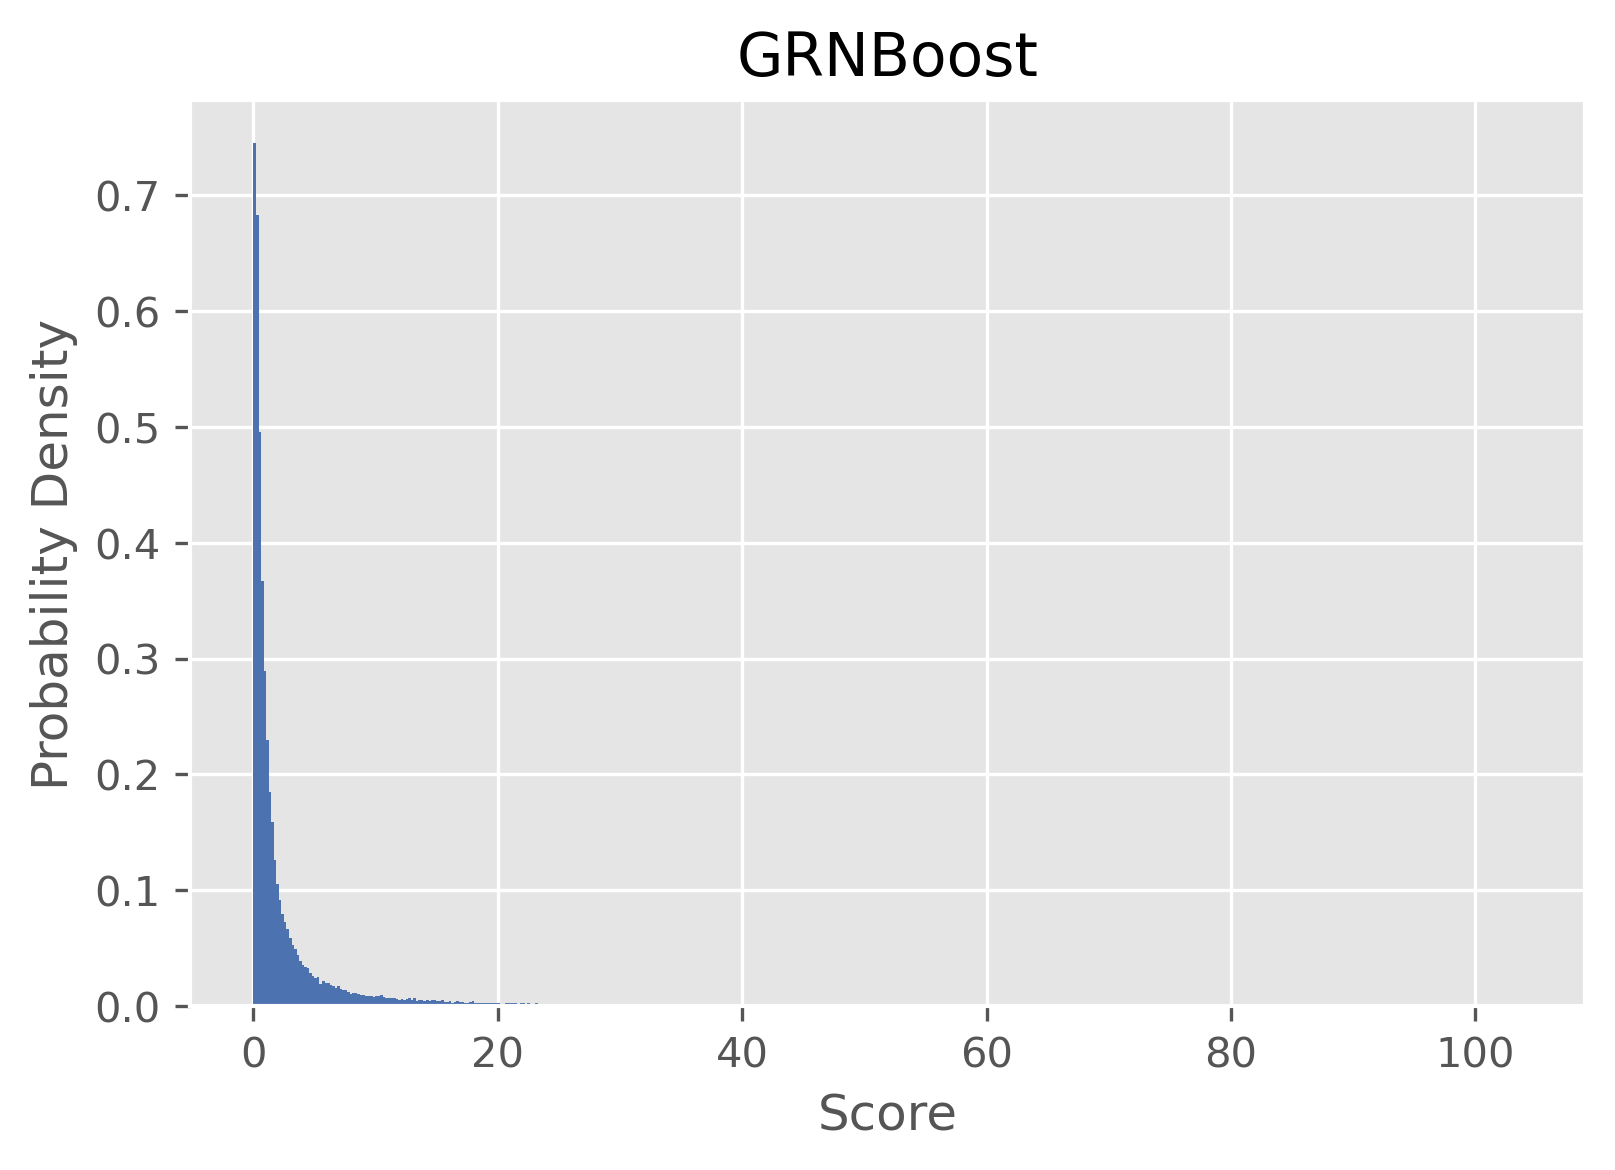

23.70663281194225


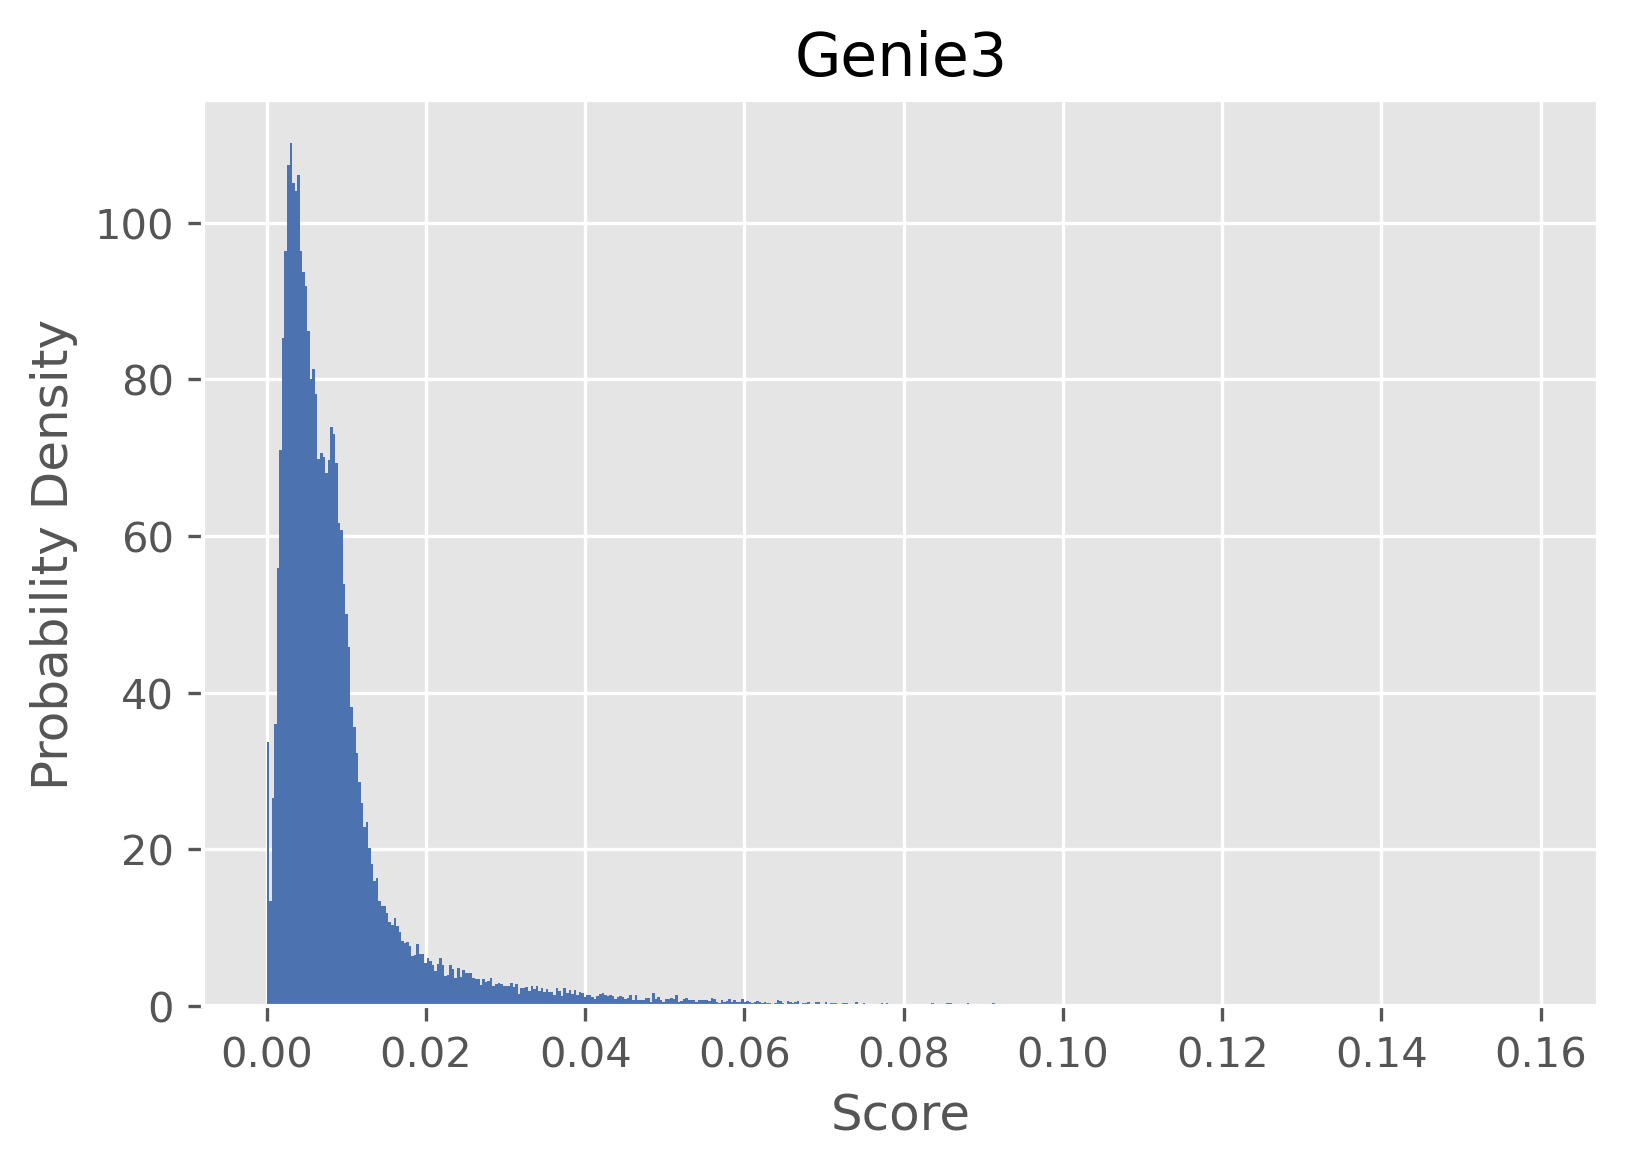

-1.1942989621300435


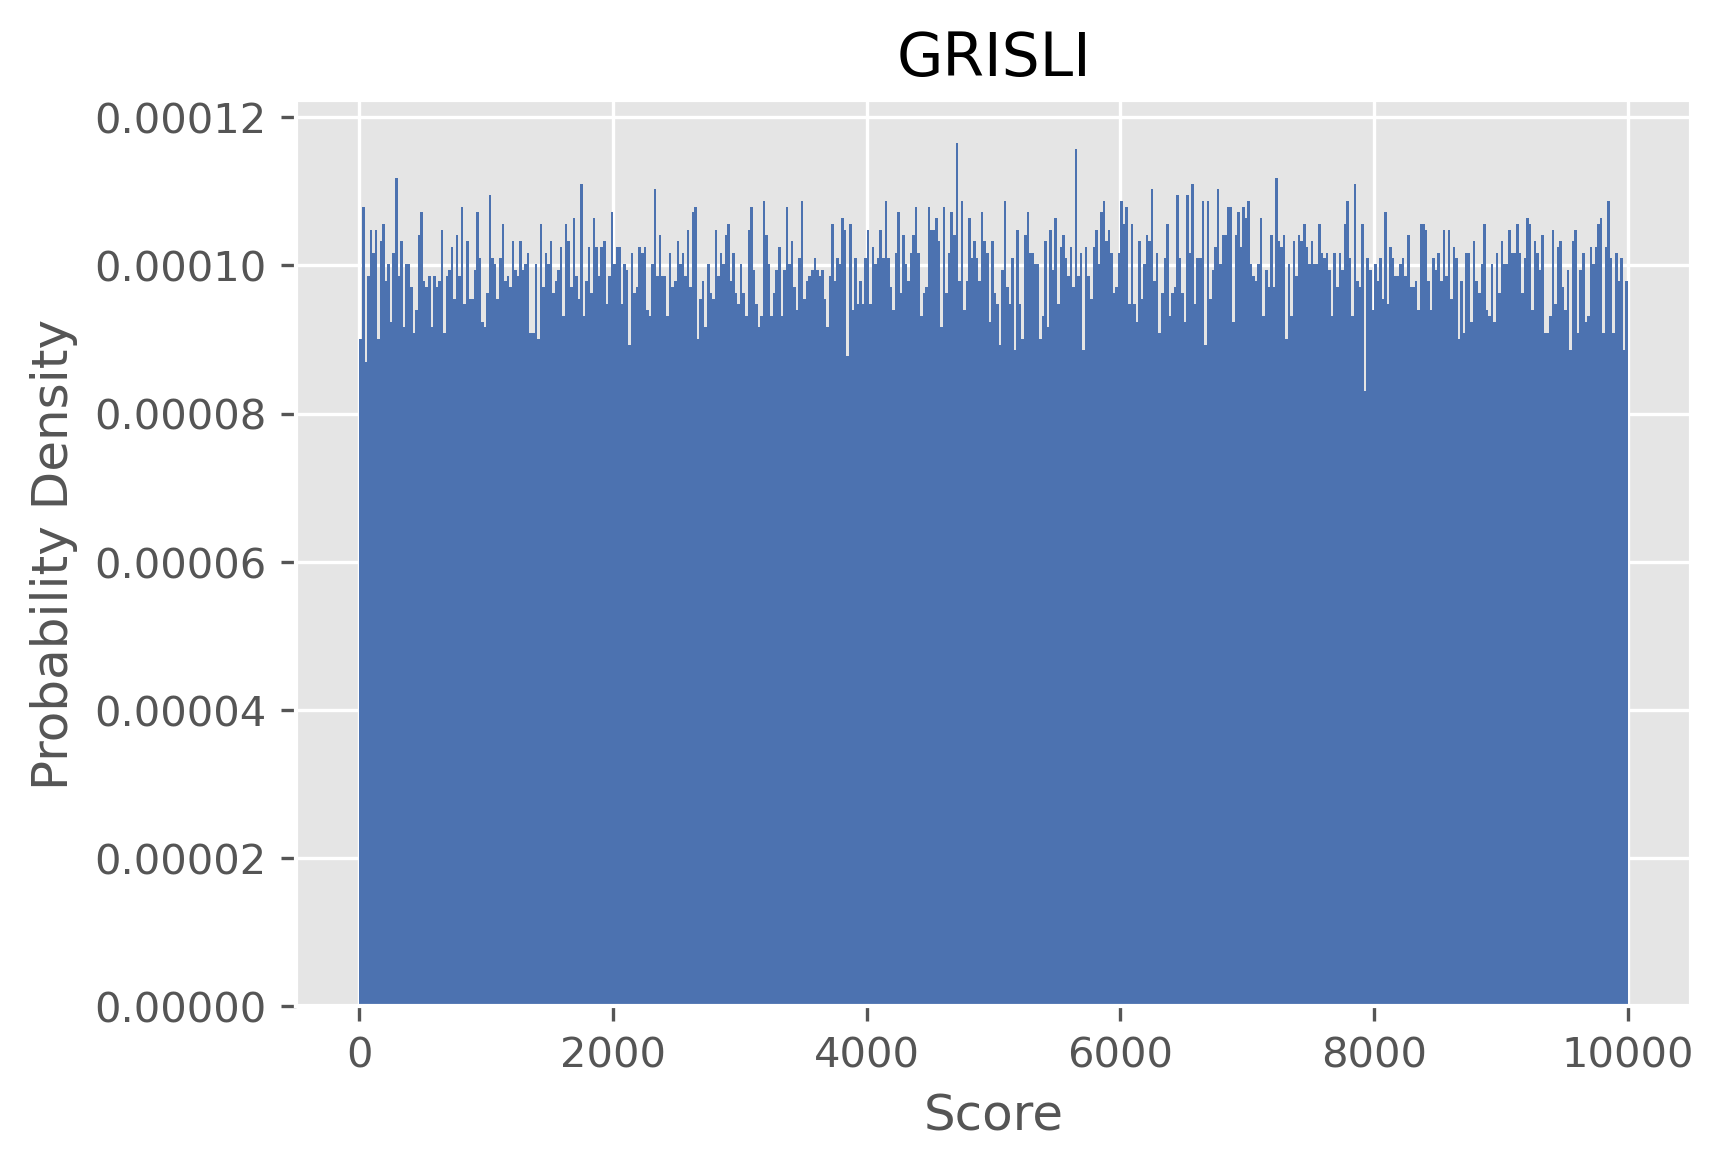

-0.6203093693578077


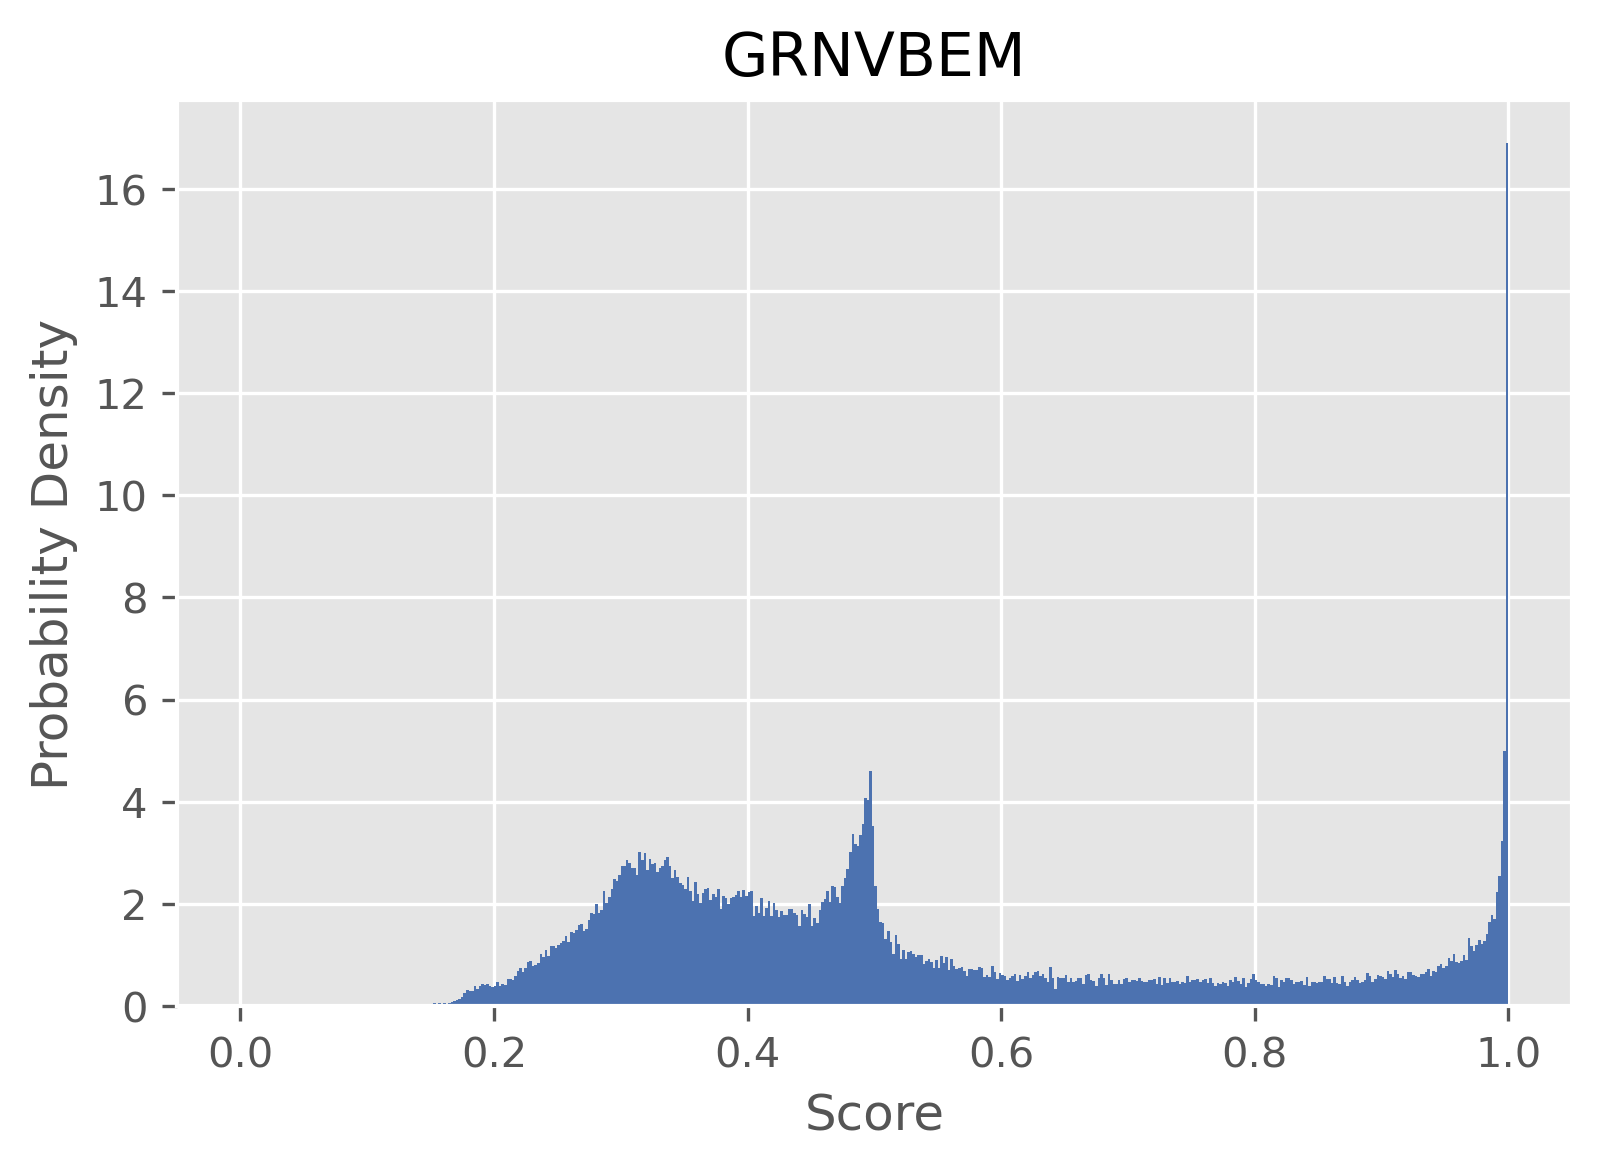

5.286798802705375


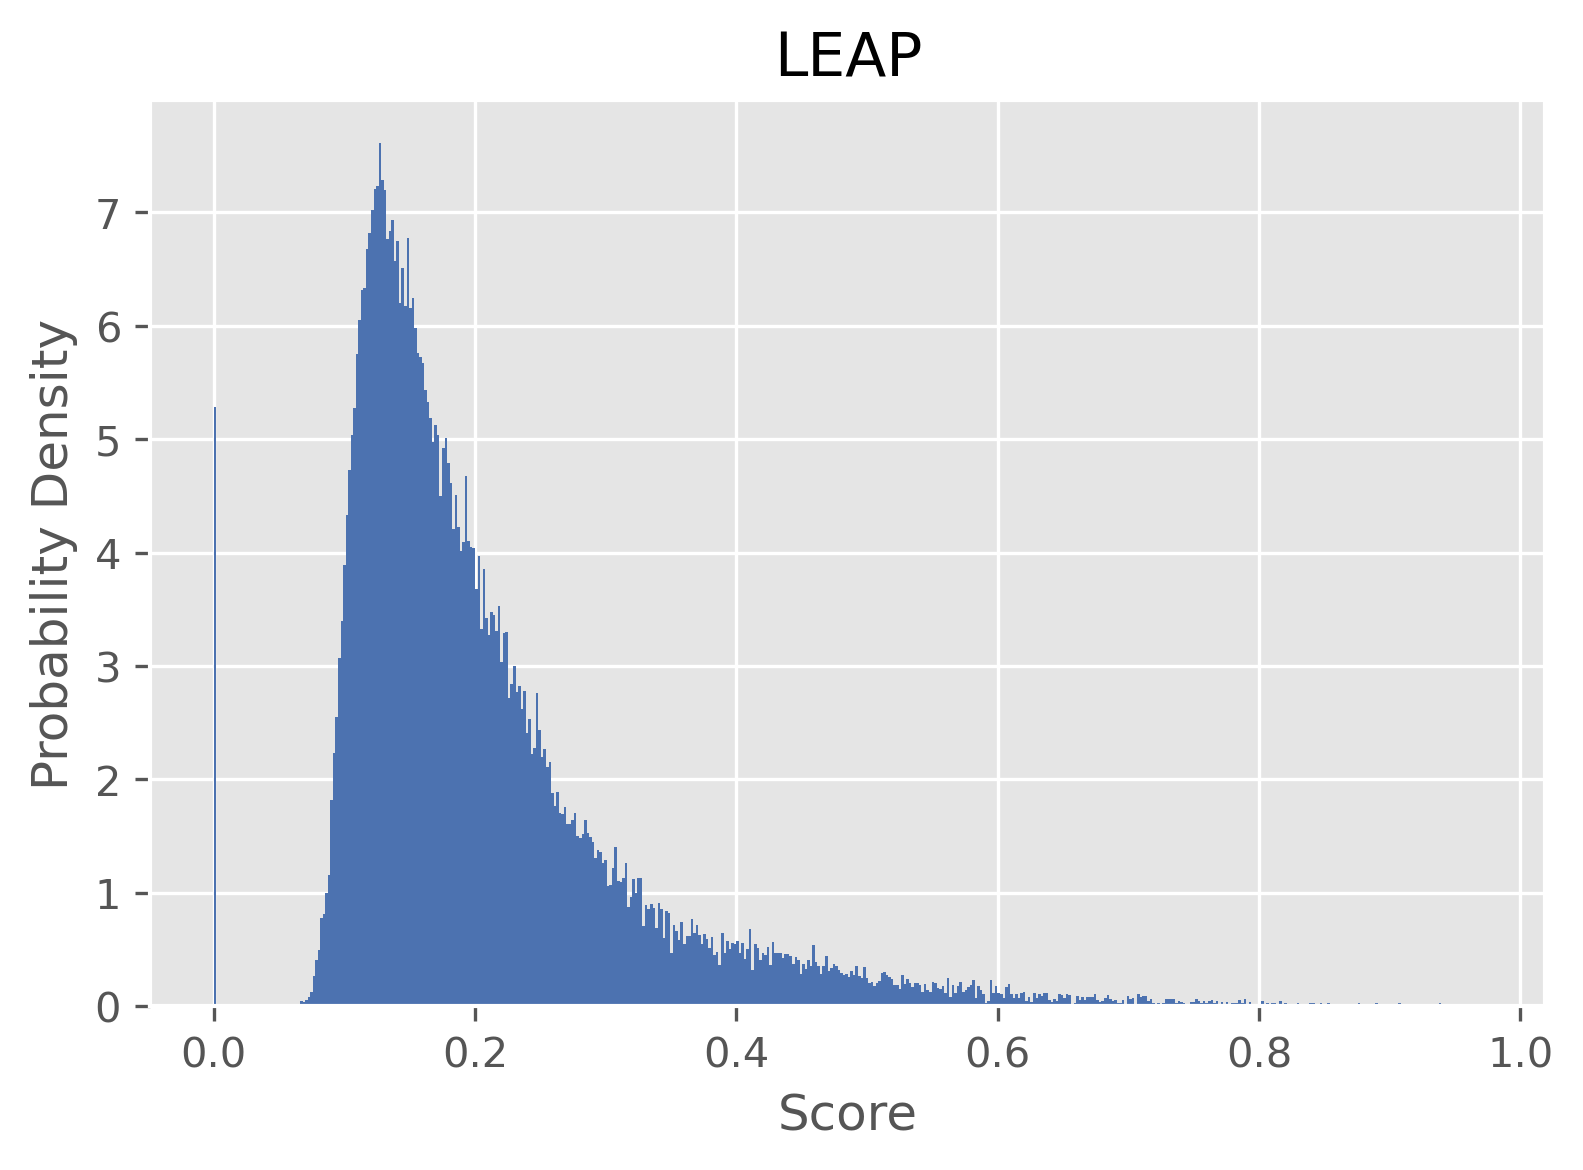

-1.1623897540034518


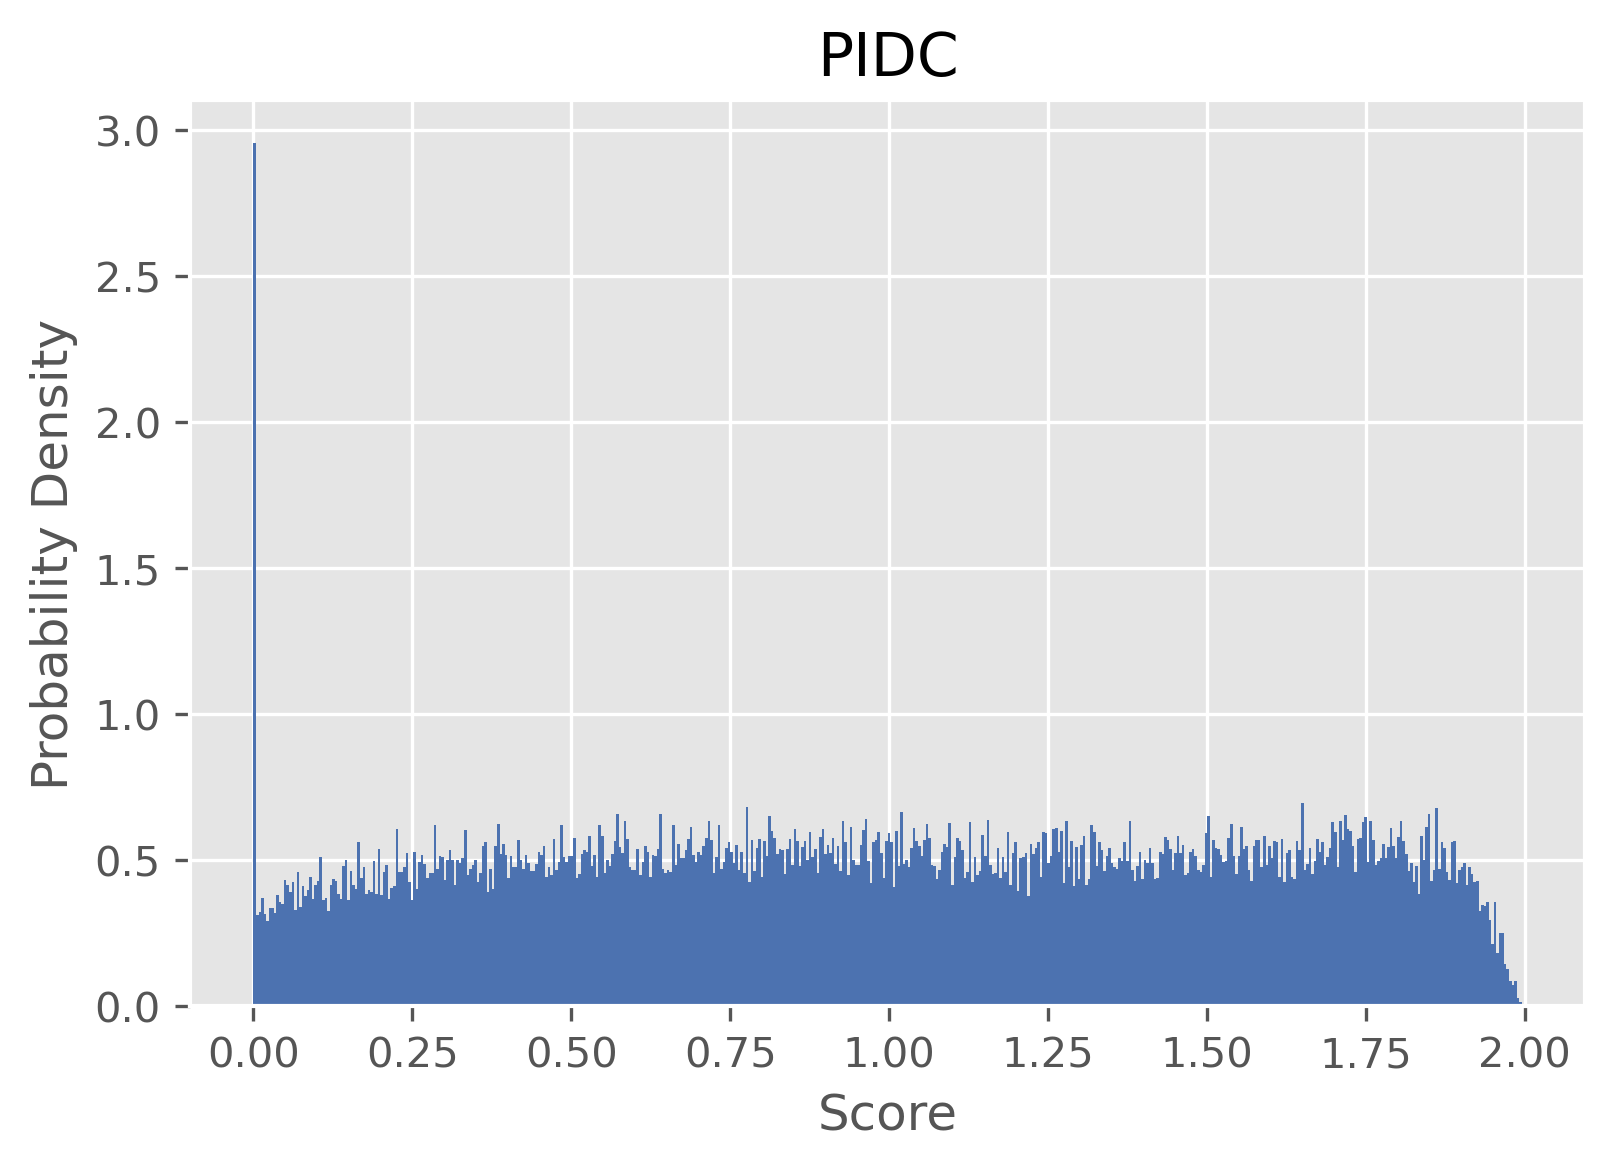

75.25376761794541


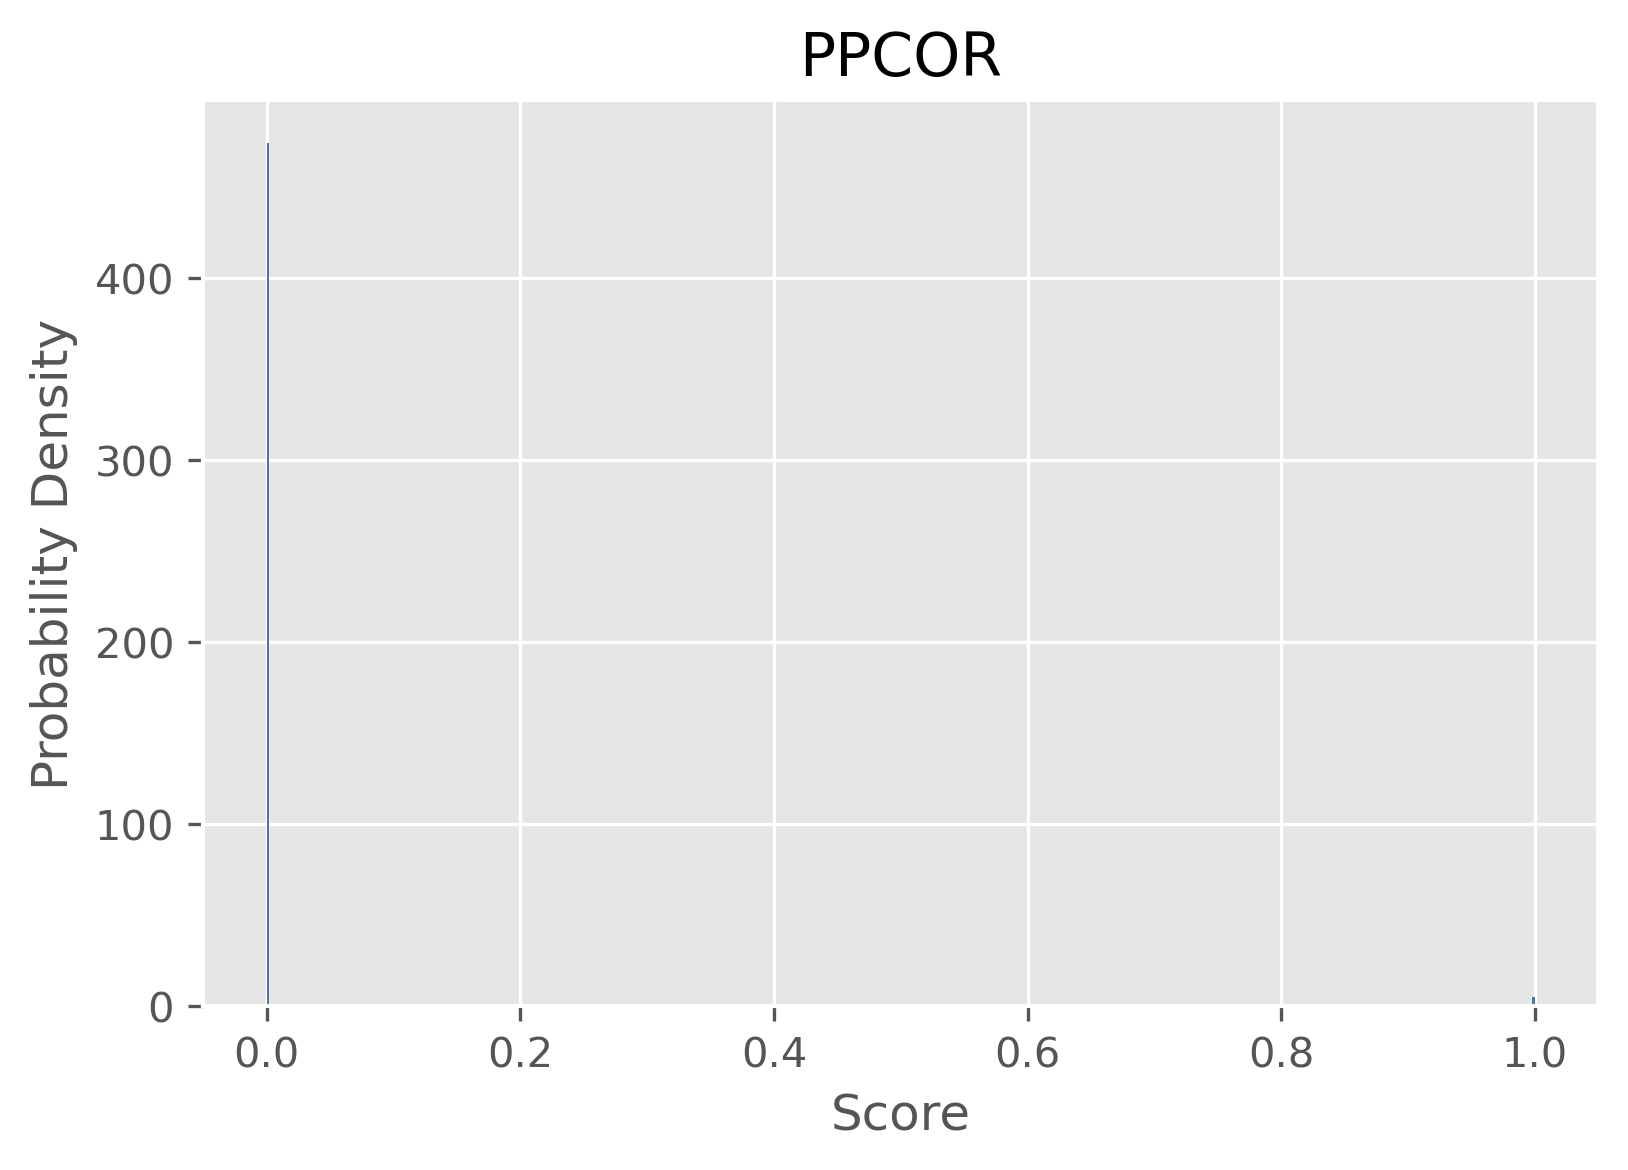

6.994492589162757


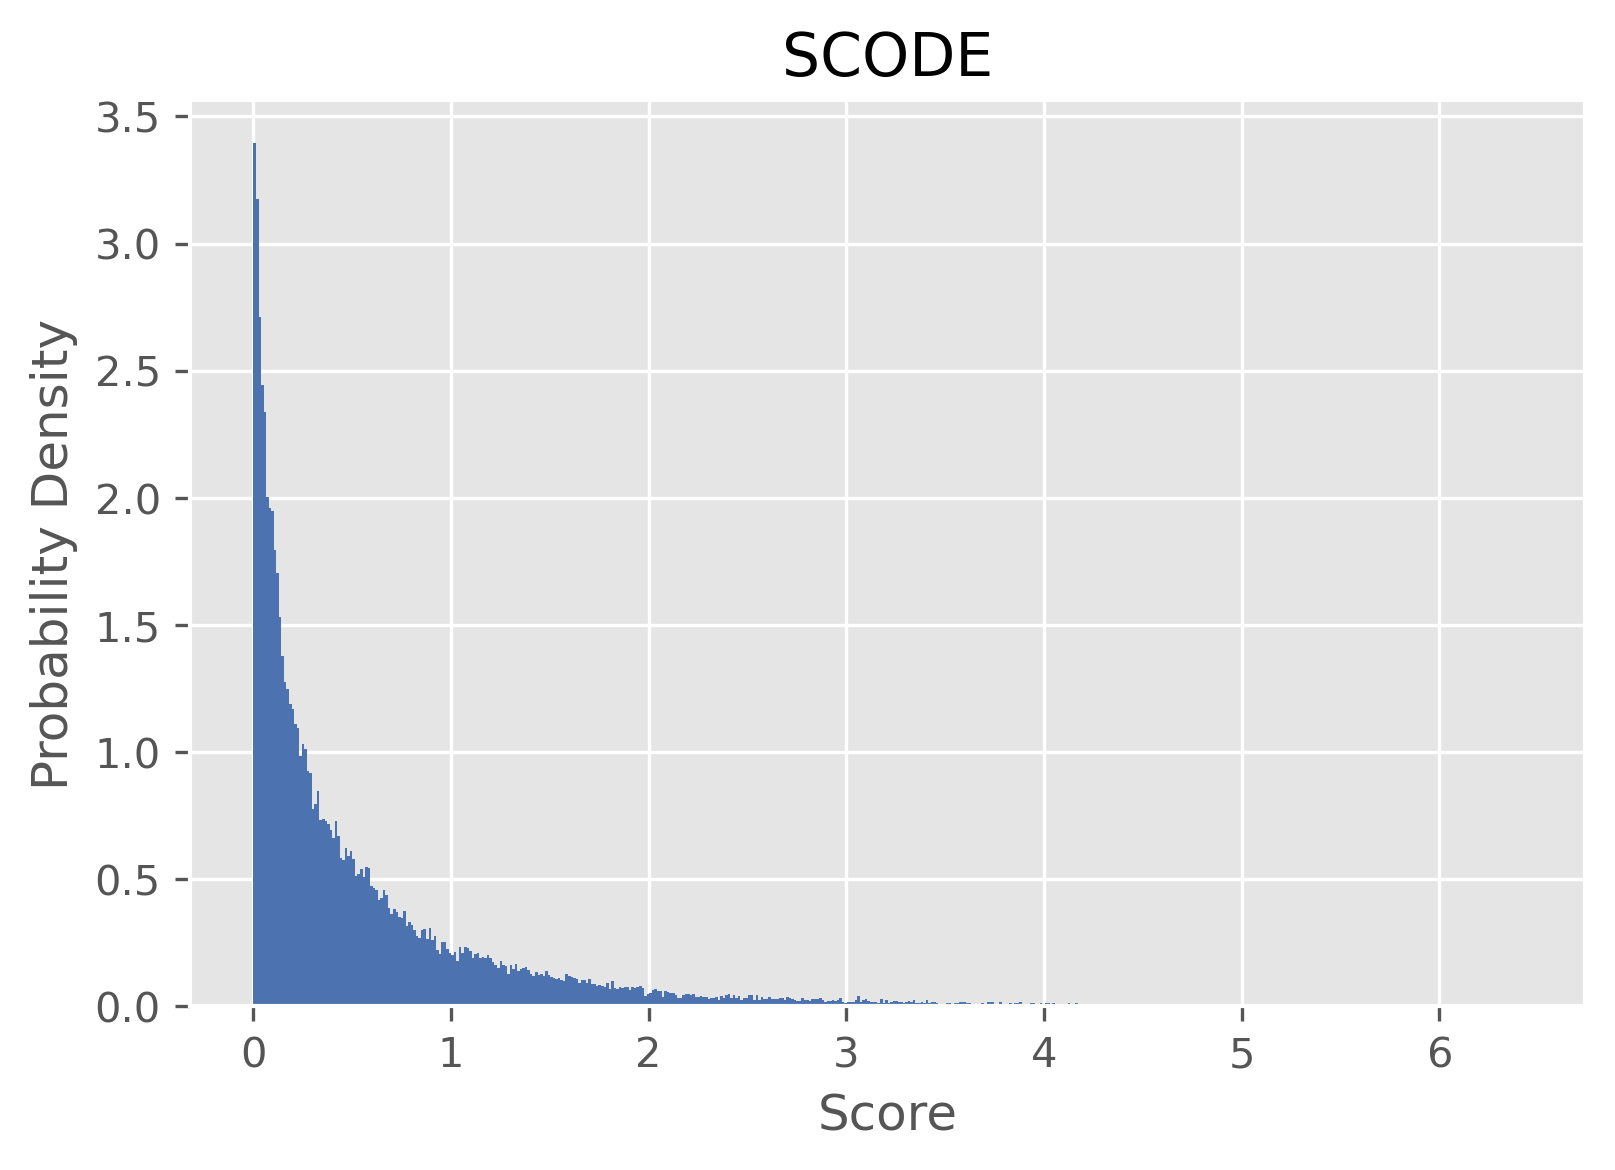

2.97585976642839


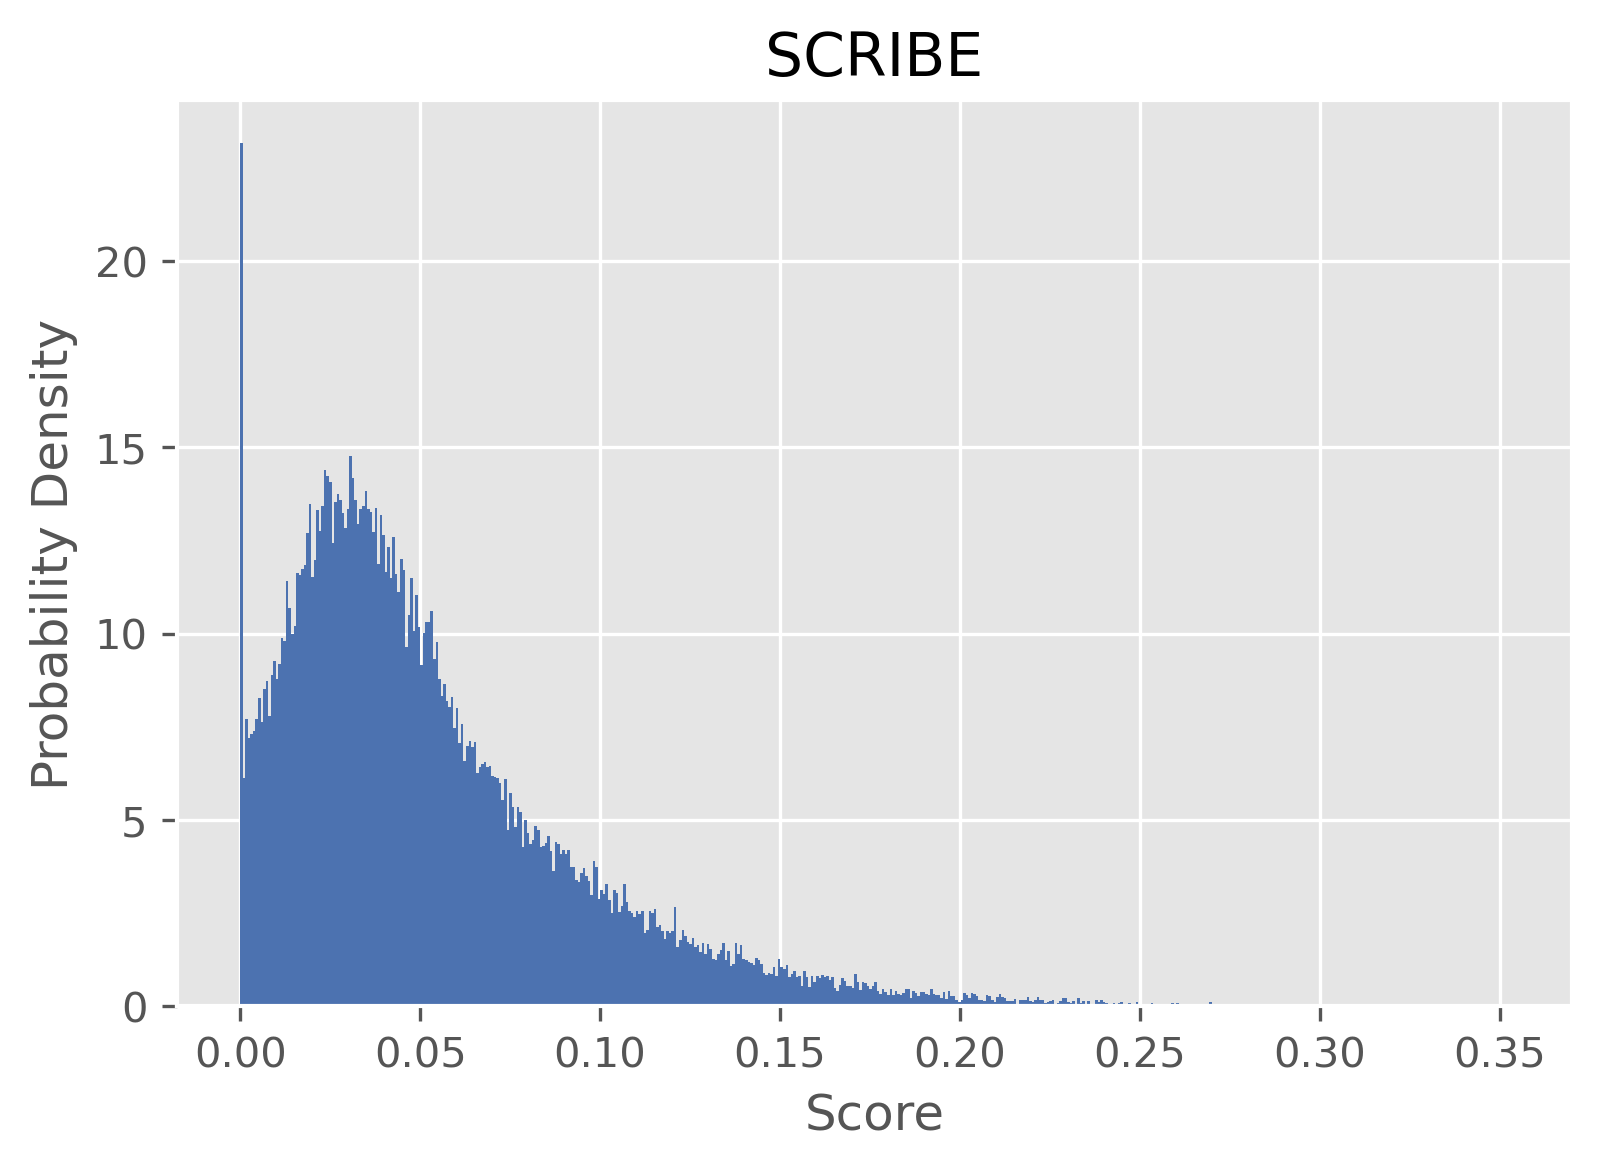

In [9]:
for i, algo in enumerate(algo_names):
    fig, ax = plt.subplots()
    ax.hist(all_train_df[all_train_df['edge_exist']==0][algo], bins=500, density=True, stacked=False)
    plt.xlabel('Score')
    plt.ylabel('Probability Density')
    plt.title(algo_print_names[i])
    # save_path = './pde_hist/' + algo_print_names[i] + '.png'
    print(kurtosis(all_train_df[all_train_df['edge_exist']==0][algo]))
    plt.show()


34.040281114576565


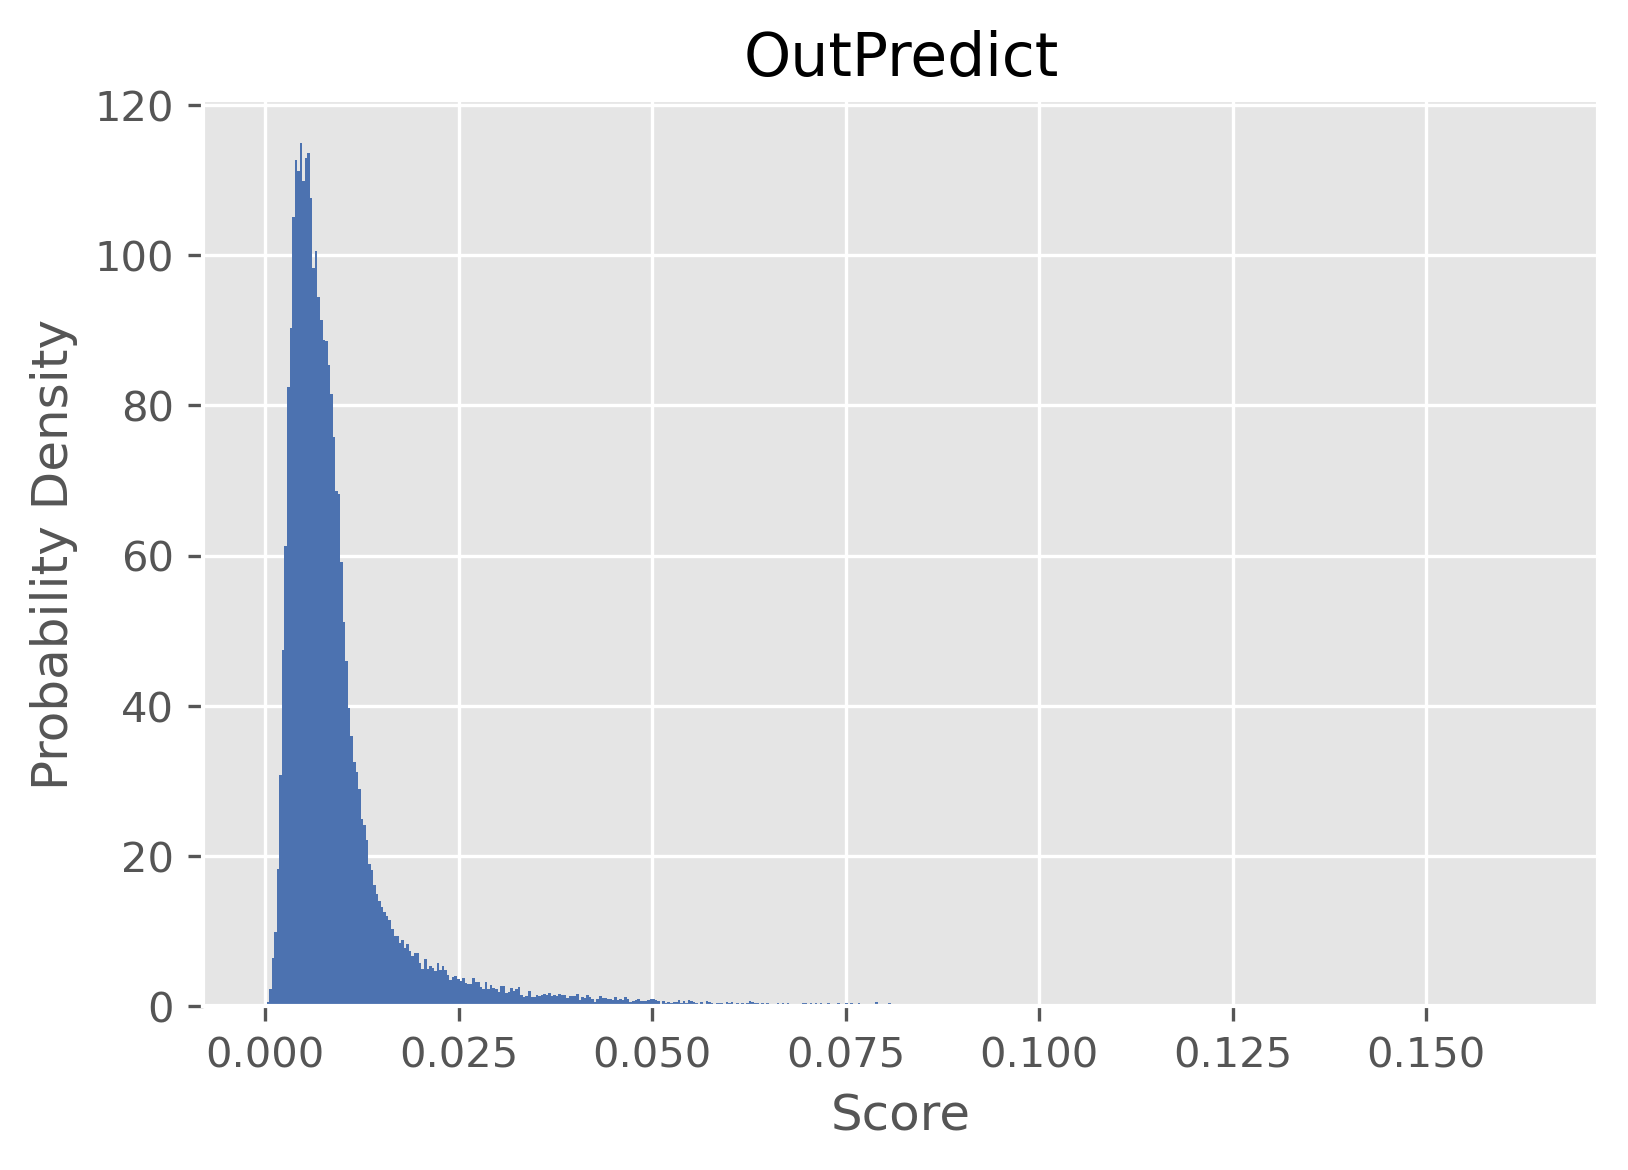

47.79093216360541


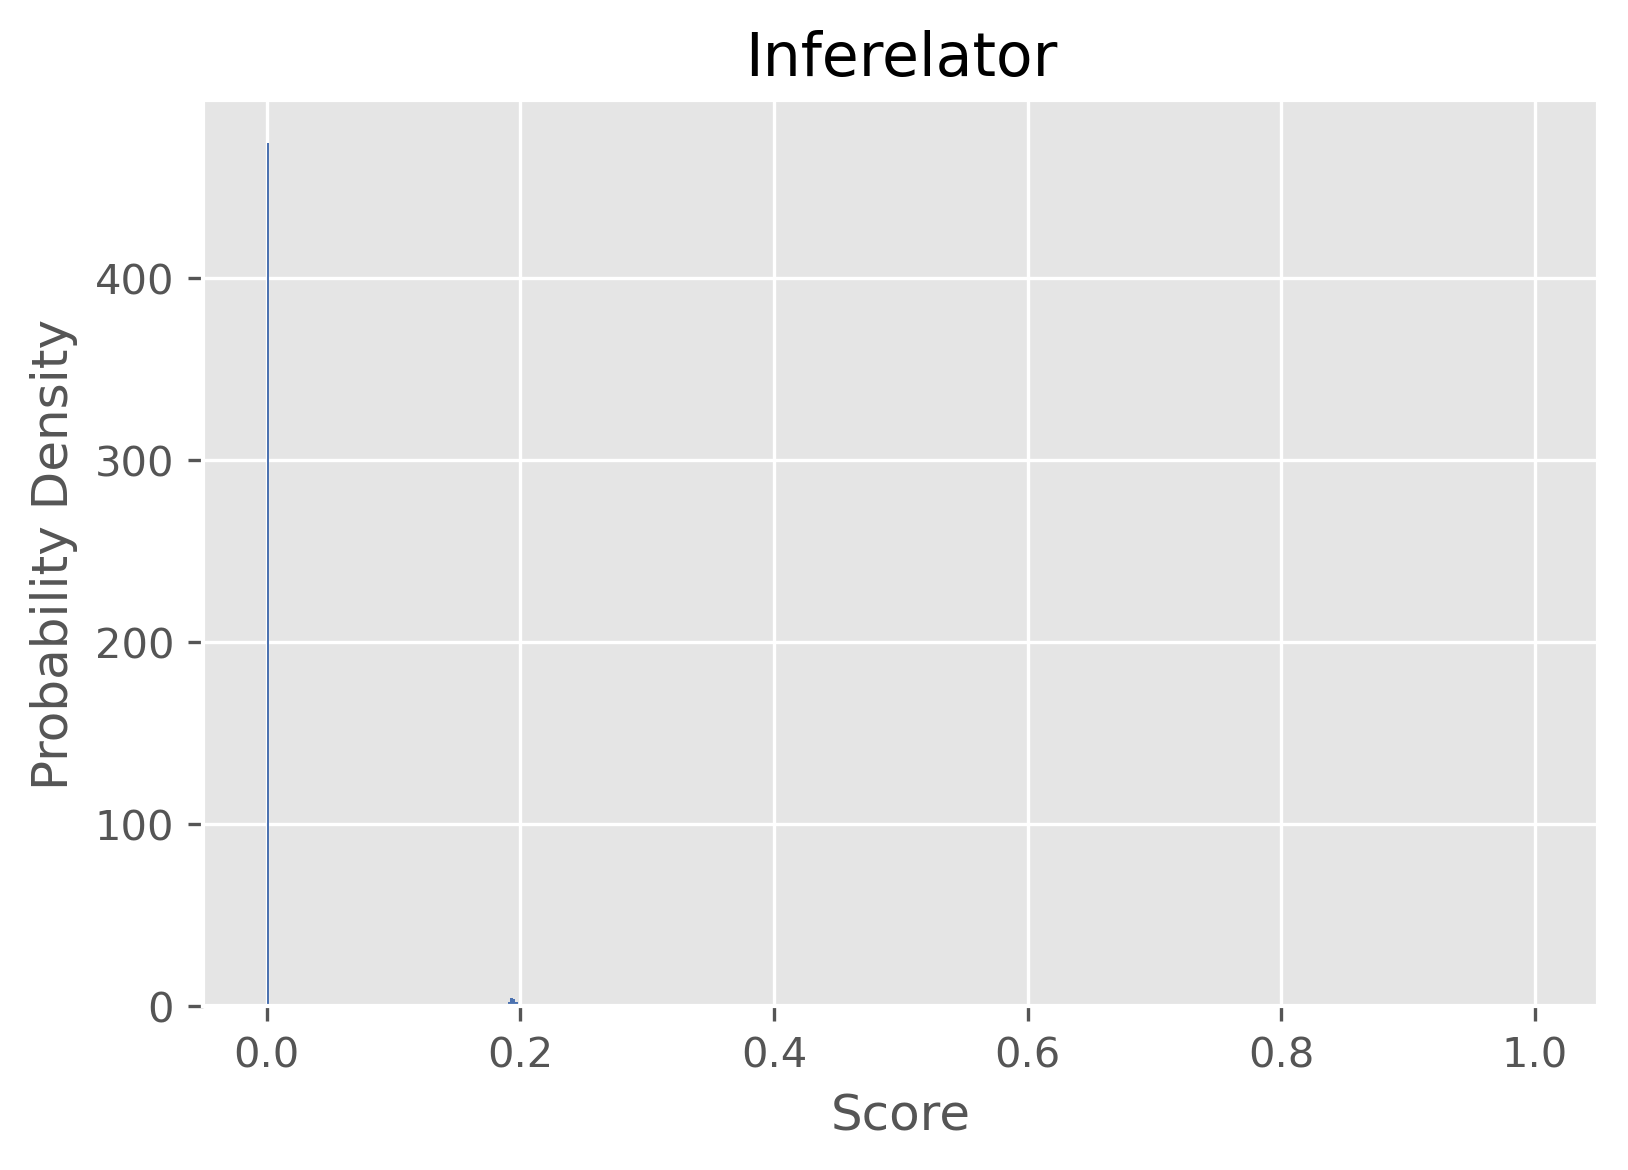

37.708997593076816


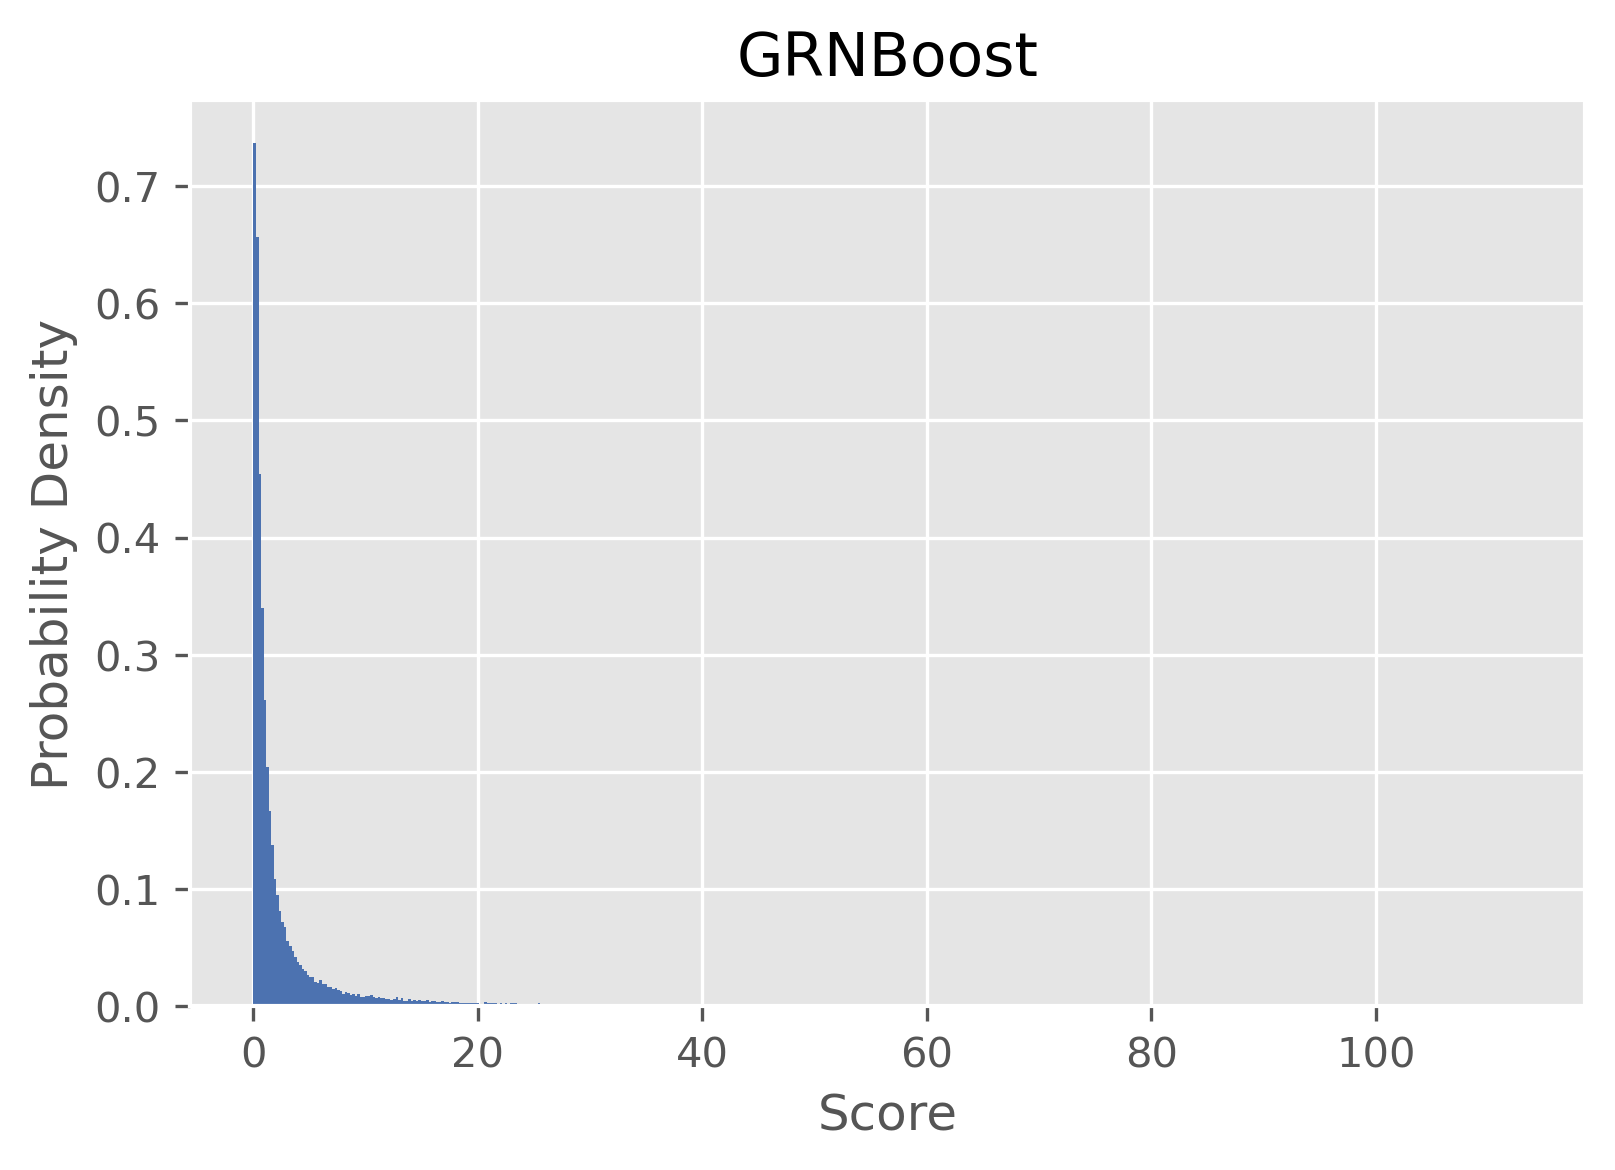

22.840167850733767


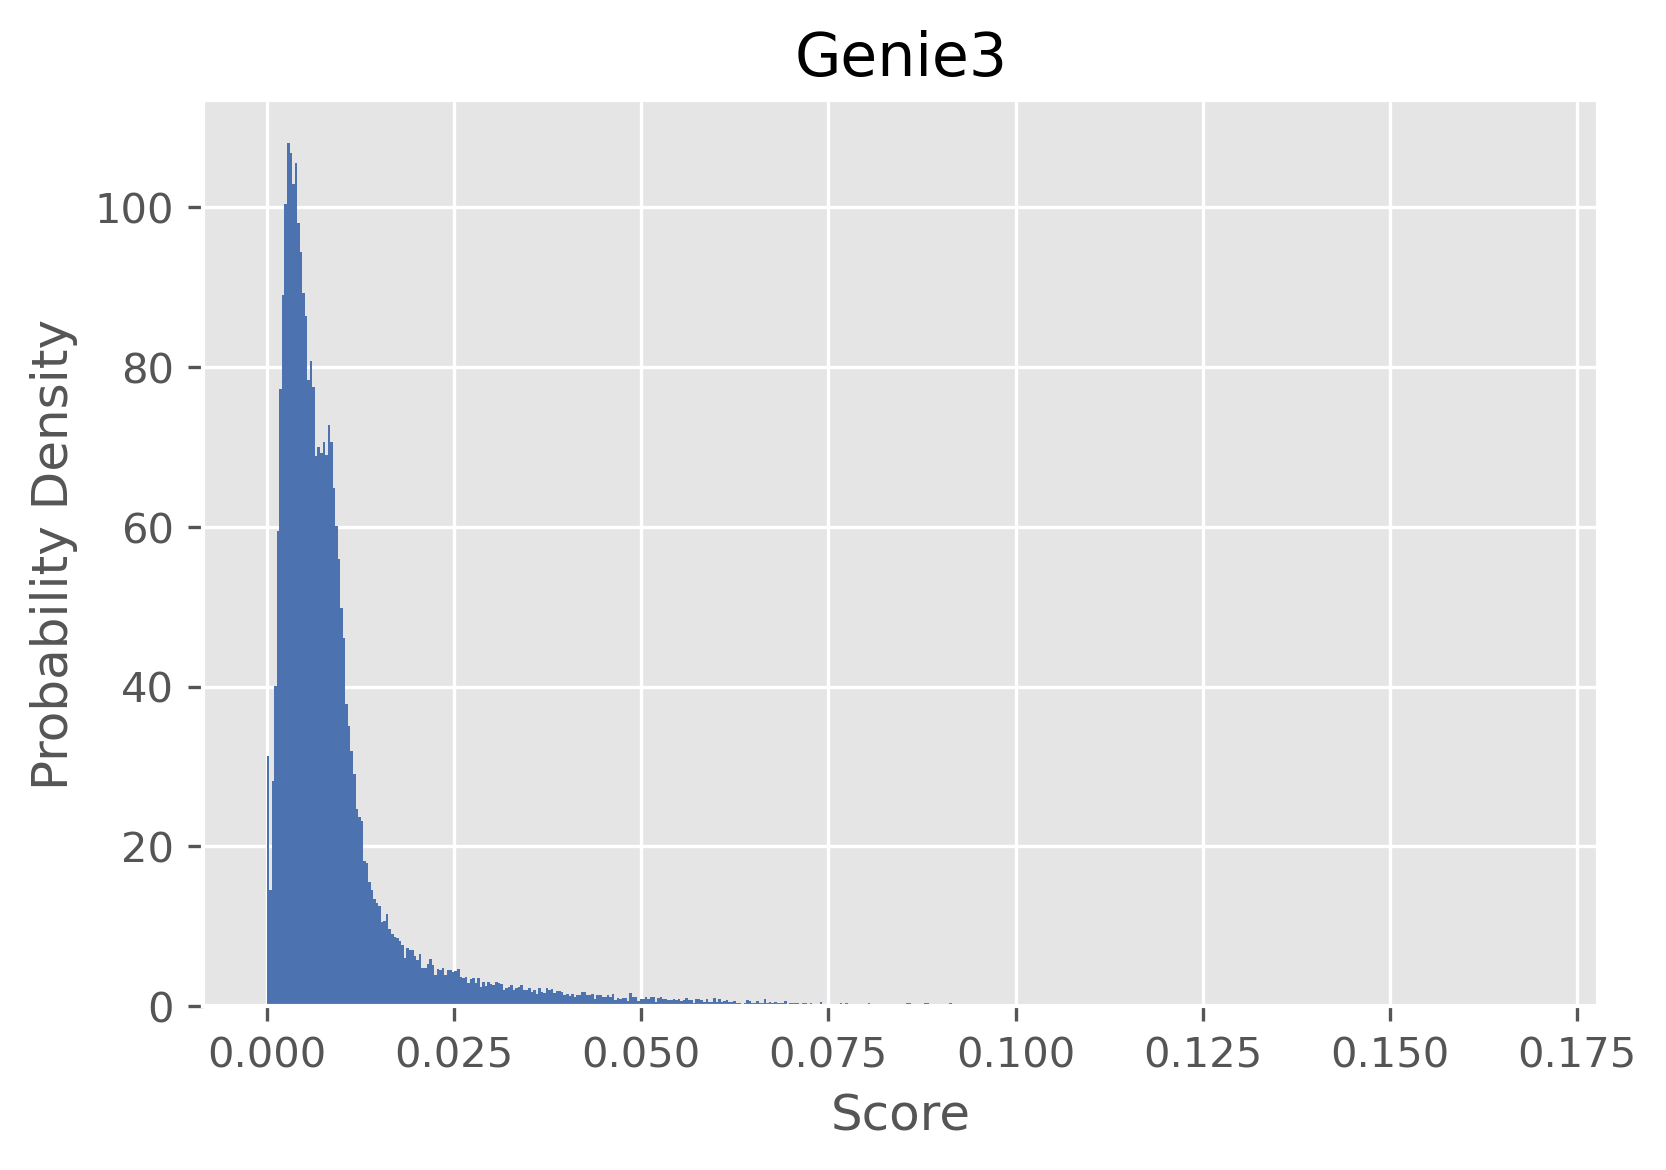

-1.1955796319014635


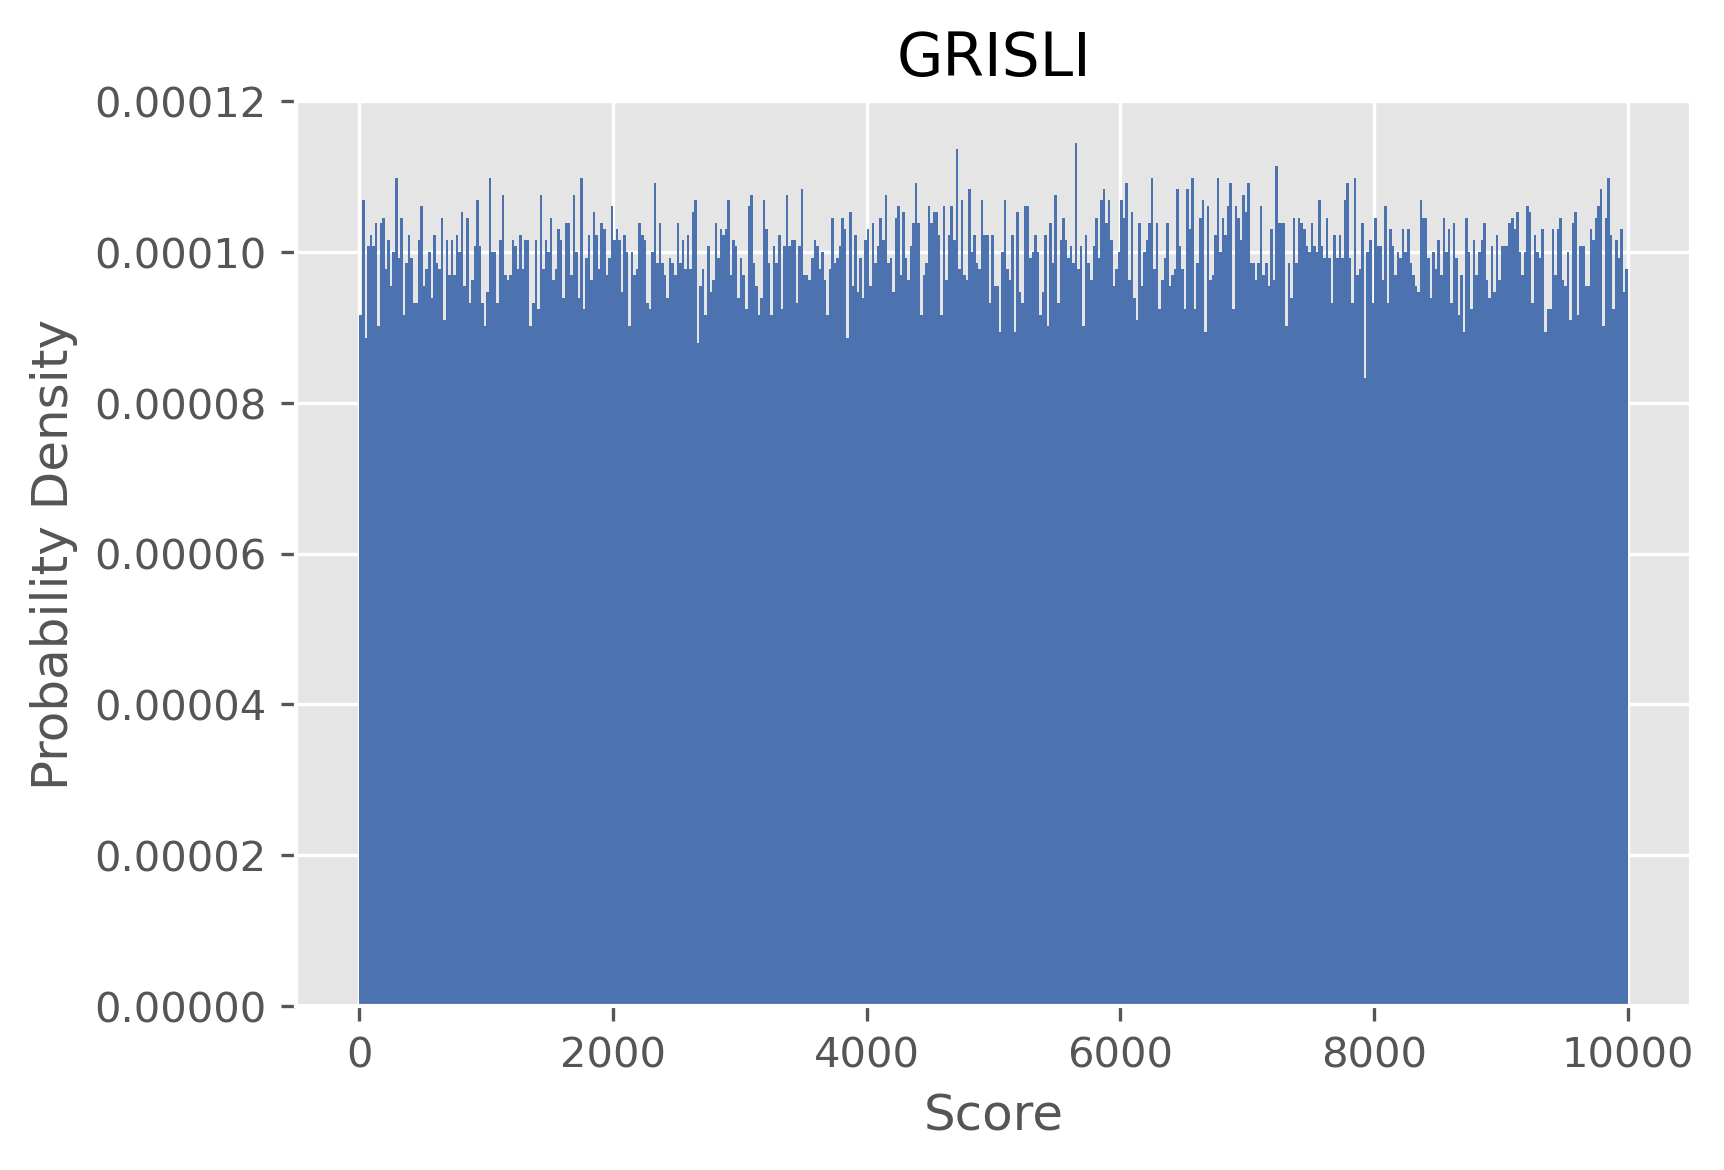

-0.6202241967967419


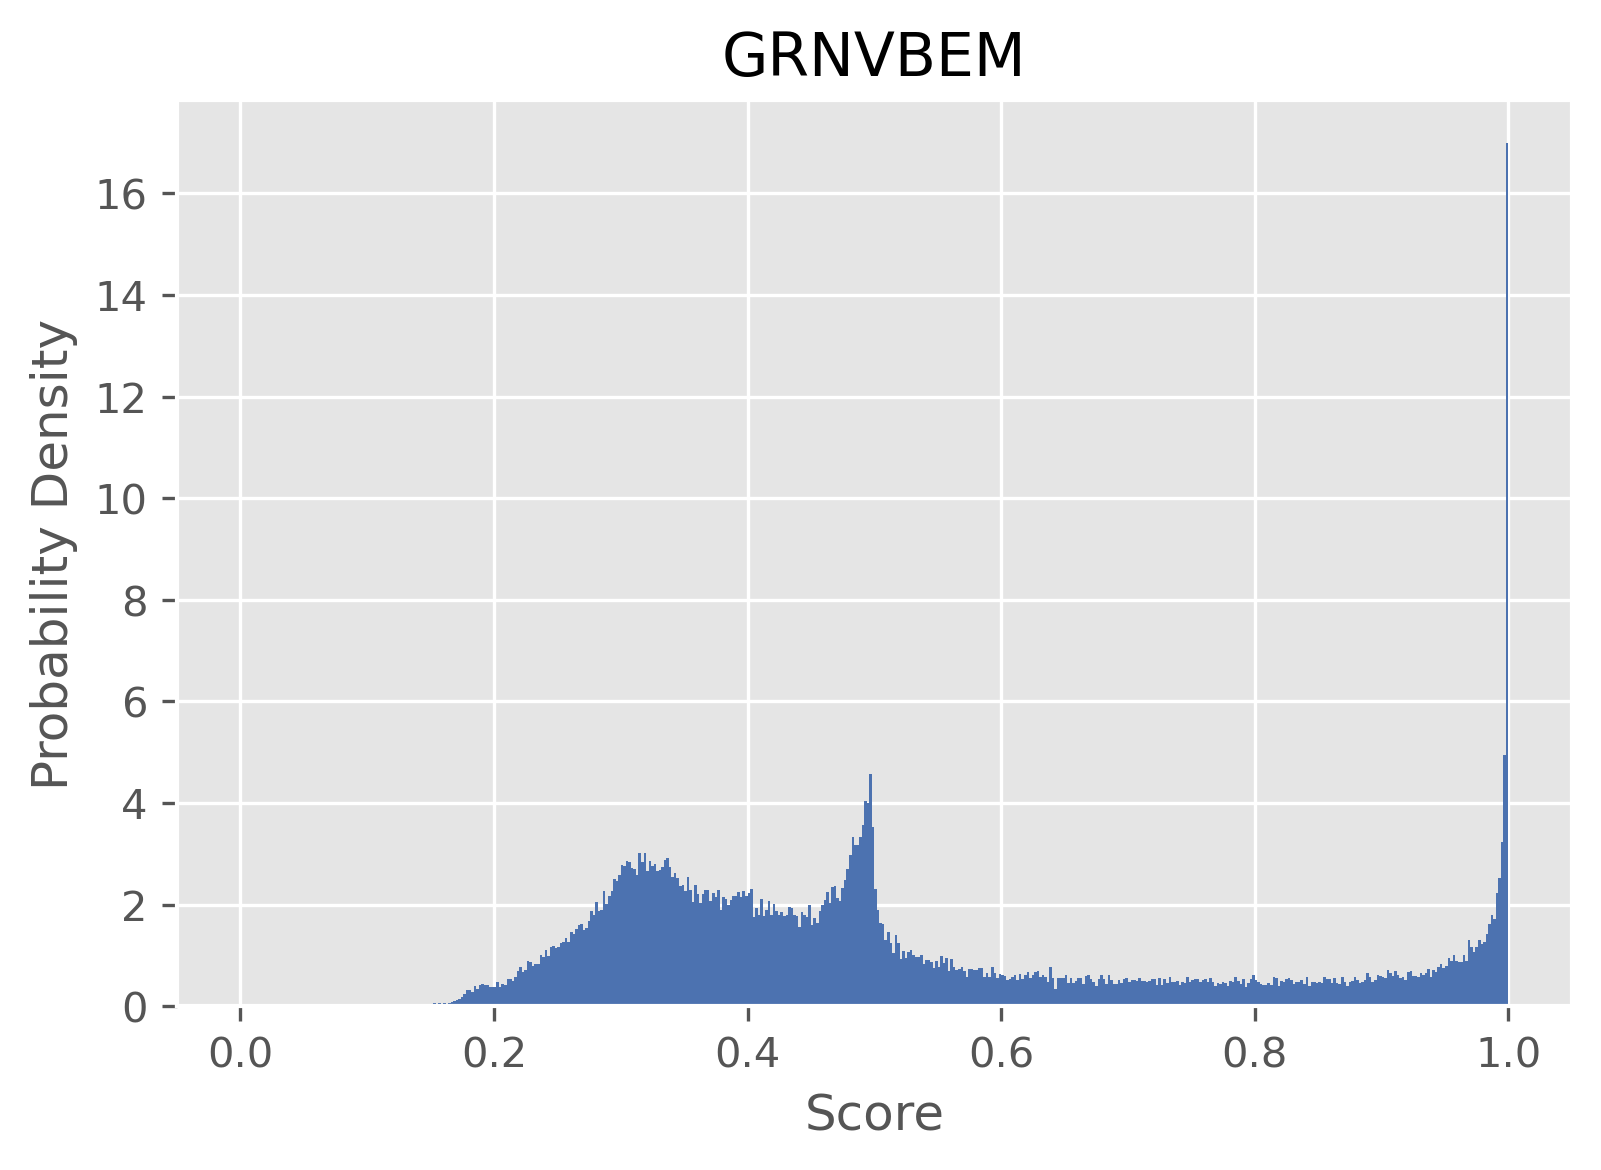

5.186886679085157


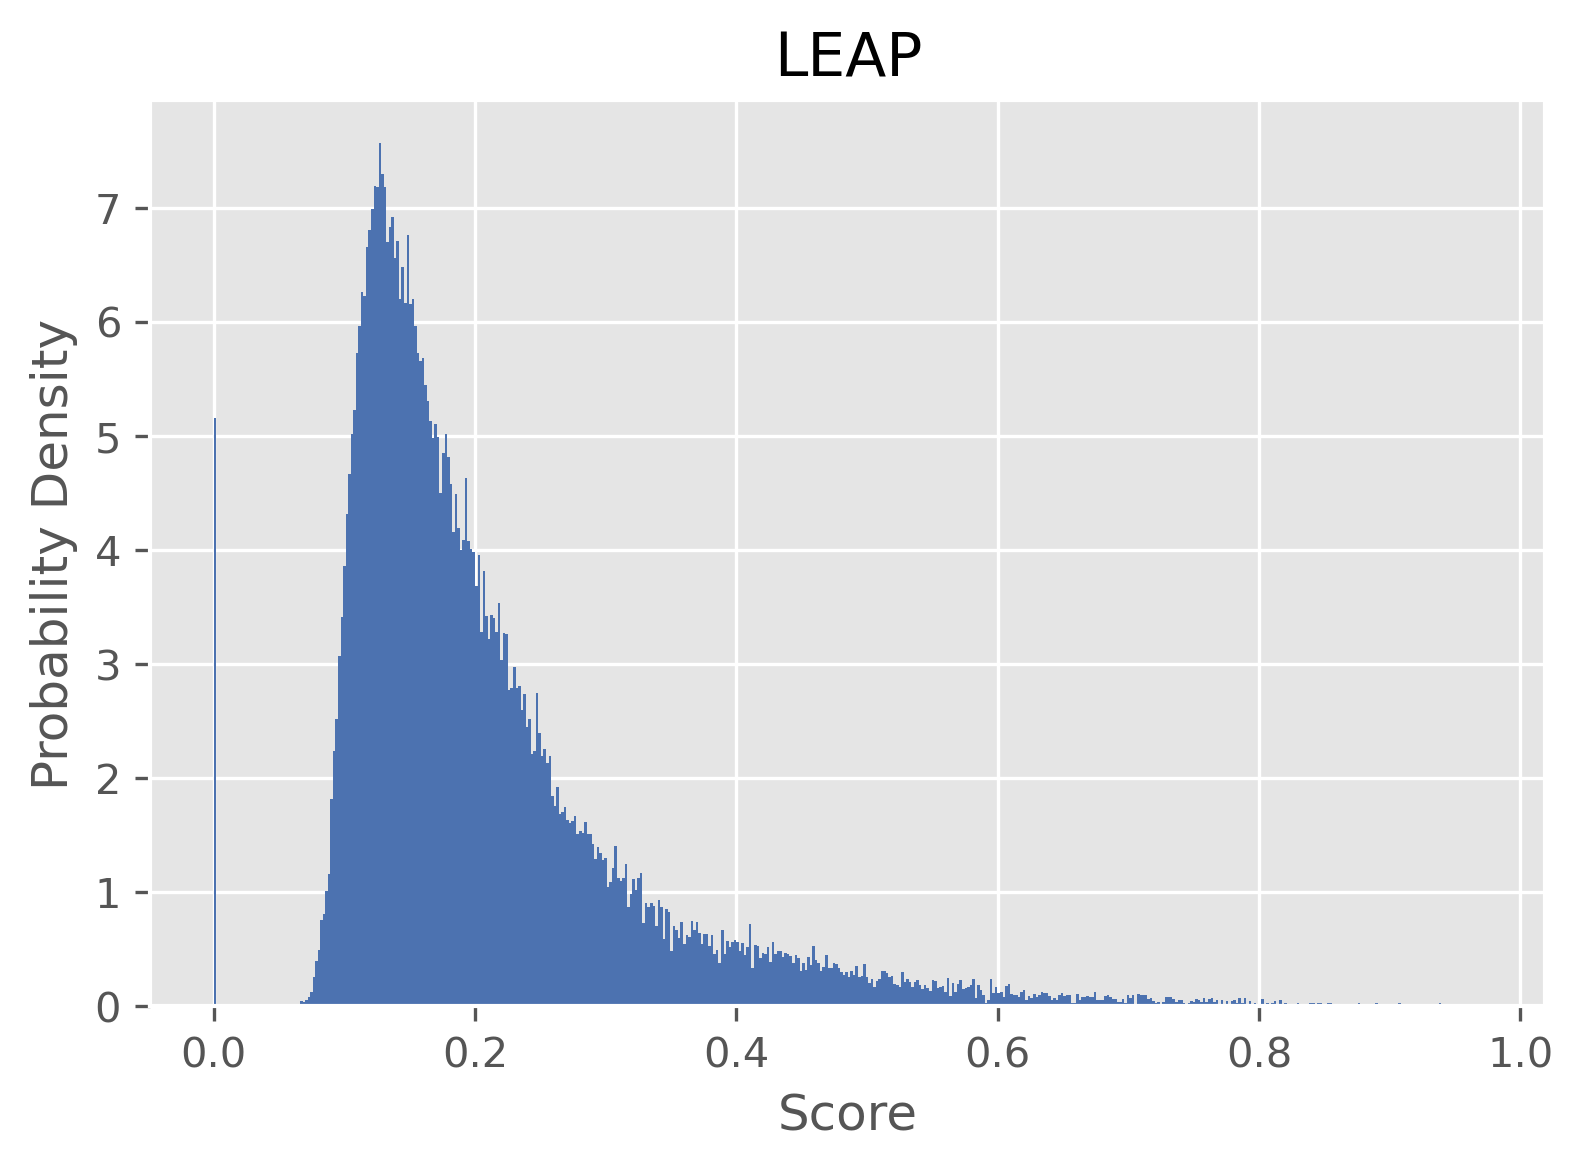

-1.1675752952032386


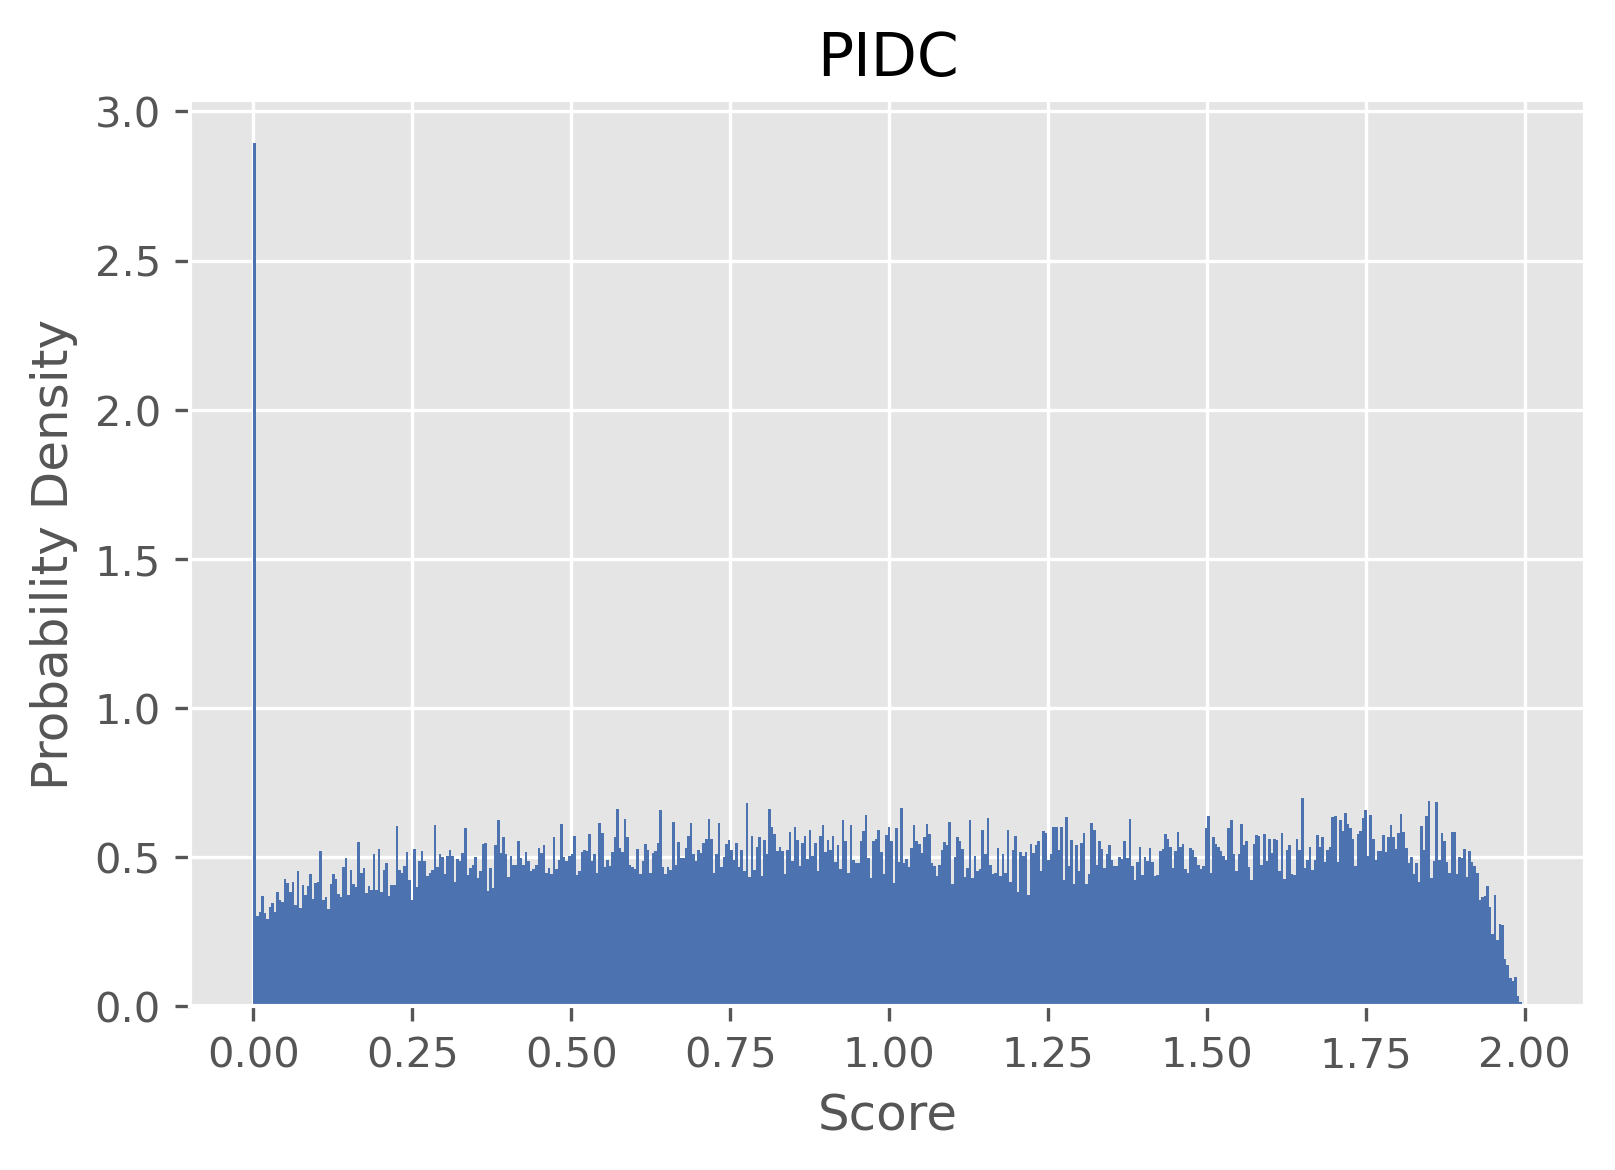

76.0725590866214


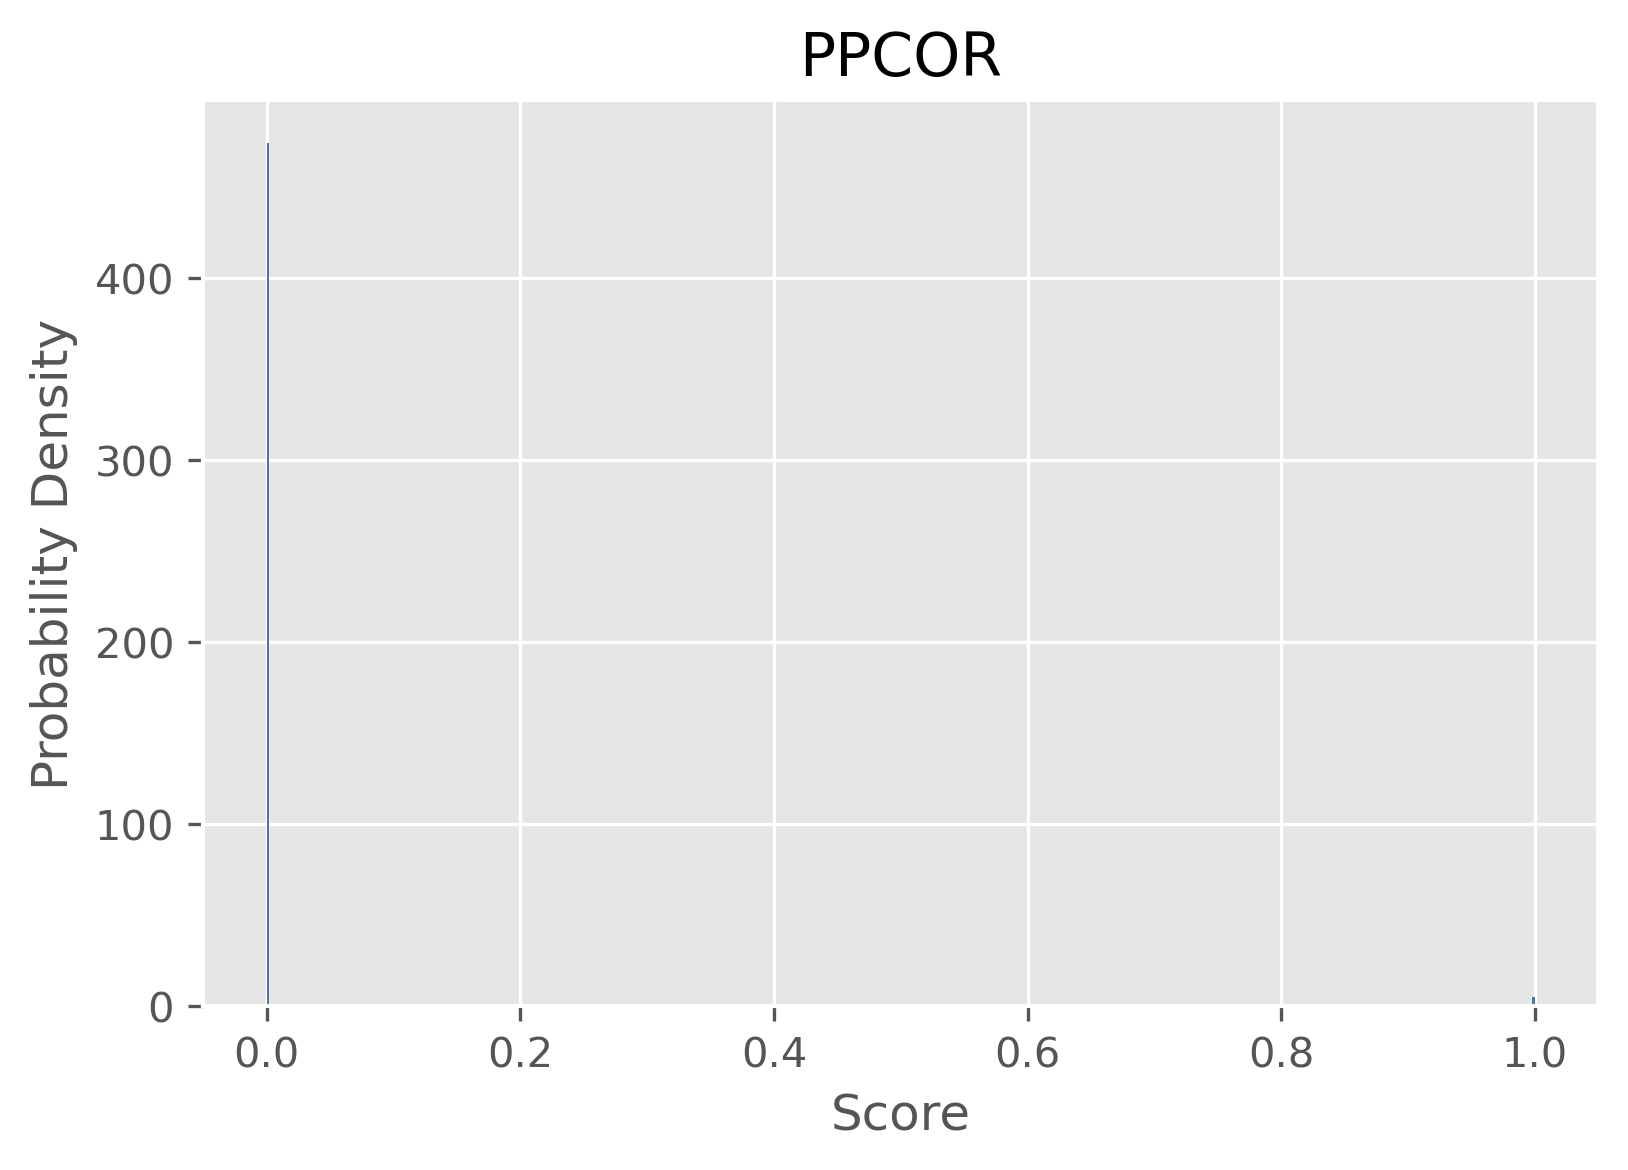

7.007089564152539


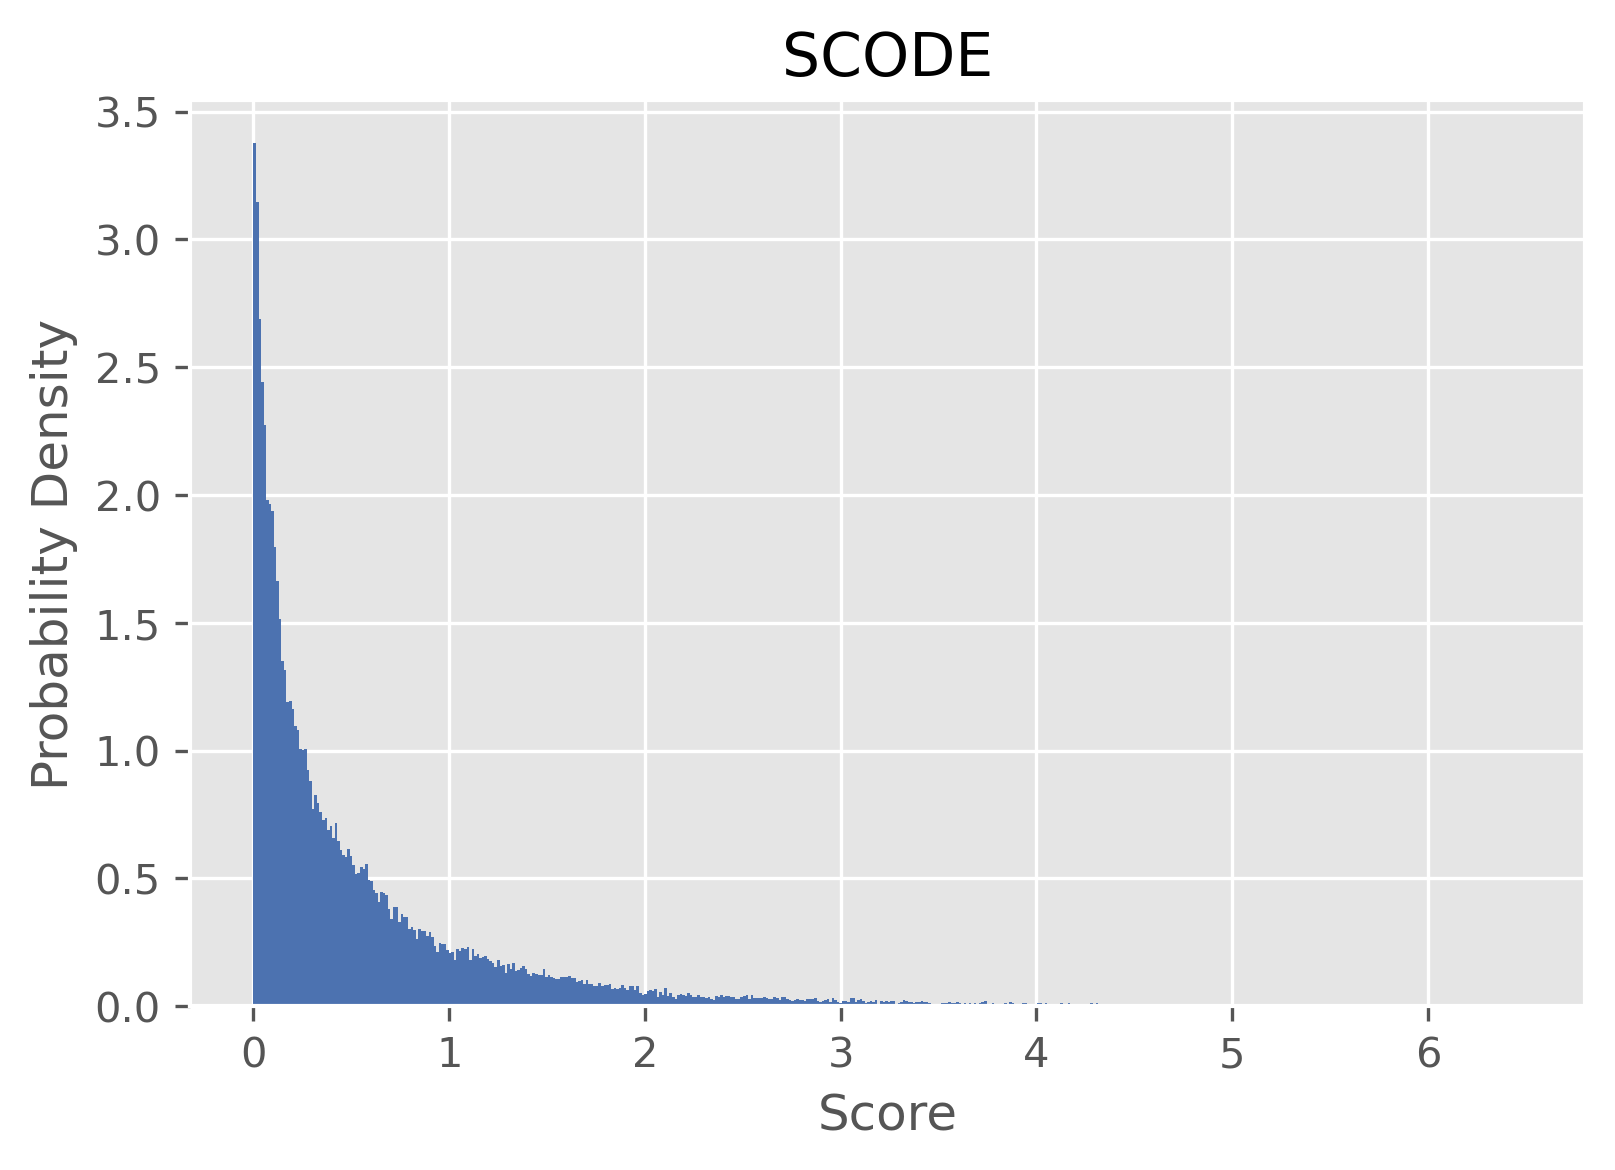

3.5660470778523736


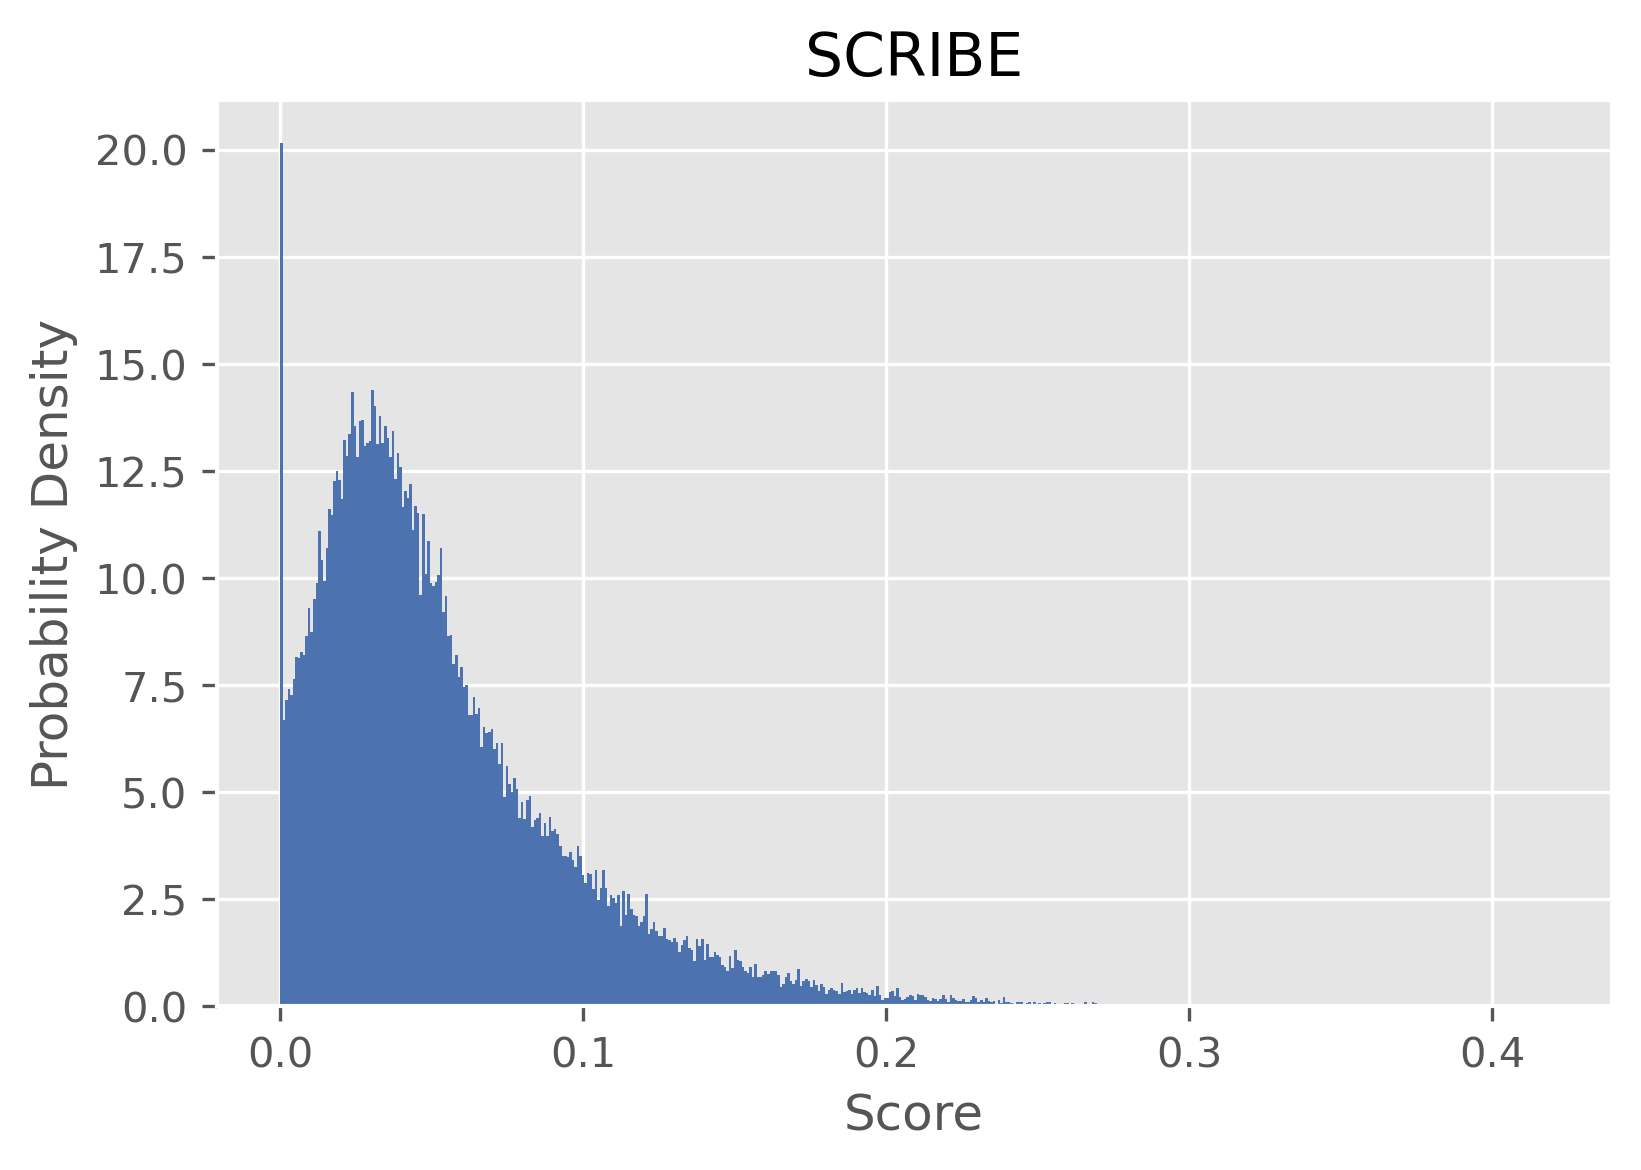

In [10]:
for i, algo in enumerate(algo_names):
    fig, ax = plt.subplots()
    ax.hist(all_train_df[algo], bins=500, density=True, stacked=False)
    plt.xlabel('Score')
    plt.ylabel('Probability Density')
    plt.title(algo_print_names[i])
    # save_path = './pde_hist/' + algo_print_names[i] + '.png'
    print(kurtosis(all_train_df[algo]))
    plt.show()


In [11]:
algo_print_names = ['OutPredict', 'Inferelator', 'GRNBoost', 'Genie3',  'GRNVBEM', 'LEAP',   'PPCOR', 'SCODE', 'SCRIBE']
# algo_names = ['op', 'inf', 'grnboost', 'genie3', 'grisli', 'grnvbem', 'leap',  'pidc', 'ppcor', 'scode', 'scribe', 'sincerities']
algo_names = ['op', 'inf', 'grnboost', 'genie3',  'grnvbem', 'leap',   'ppcor', 'scode', 'scribe']

In [12]:
ensemble_models = [
    LogisticRegression(random_state=42, n_jobs=-1, C=100, penalty='l2',solver='newton-cg'), 
    GaussianNB(var_smoothing=2.848035868435805e-09), 
    SGDClassifier(loss='log', random_state=42, n_jobs=-1, alpha=0.1, penalty='l2'), 
    SVC(random_state=42, probability=True, C=50, gamma='scale', kernel='rbf'), 
    KNeighborsClassifier(metric='manhattan', n_neighbors=1, weights='uniform'), 
    RandomForestClassifier(random_state=42, n_jobs = -1, bootstrap=False, max_depth=8, max_features='sqrt', n_estimators=500), 
    AdaBoostClassifier(random_state=42, learning_rate=0.1, n_estimators=100), 
    XGBClassifier(random_state=42, n_jobs=-1, max_depth=6, learning_rate=1,n_estimators=500)
]

In [13]:
df_columns = algo_print_names + ['Ensemble_LR', 'Ensemble_NB', 'Ensemble_SGD', 'Ensemble_SVM', 'Ensemble_KNN', 'Ensemble_RF', 'Ensemble_AB', 'Ensemble_XGB']
df_columns = df_columns + ['best_train_algo', 'best_test_algo', 'best_train_score', 'best_test_score']

In [14]:

pr_df = pd.DataFrame(columns=df_columns)
for i in range(10):
    test_ensemble = ensemble_df_list[i]
    train_ensemble = pd.DataFrame(columns=test_ensemble.columns)
    for index, train_df in enumerate(train_df_list):
        if (index != i):
            train_ensemble = pd.concat([train_ensemble,train_df])
    train_ensemble = train_ensemble.sample(frac=0.2, random_state=42)
    min_max_scaler = preprocessing.MinMaxScaler()
    # train on all other dream sets' ranking results, validation on current set
    # X_train = train_ensemble[algo_names].values 
    X_train = train_df_list[i][algo_names].values 
    # X_train = min_max_scaler.fit_transform(X_train)
    X_test = test_ensemble[algo_names].values 
    # X_test = min_max_scaler.fit_transform(X_test)
    train_ensemble = train_ensemble.astype({'edge_exist': 'int8'})
    test_ensemble = test_ensemble.astype({'edge_exist': 'int8'})
    train_df_list[i] = train_df_list[i].astype({'edge_exist': 'int8'})
    # y_train = train_ensemble['edge_exist']
    y_train = train_df_list[i]['edge_exist']
    y_test = test_ensemble['edge_exist']
    # base algo ranking in trianing set 
    pr_list = []
    pr_scores = []
    for j in range(len(algo_names)):
        try:
            pr = precision_recall_curve(y_train, X_train[:,j])
        except:
            print(algo_print_names[j])
        # pr = precision_recall_curve(y_train, X_train[:,j])
        pr_list.append(pr)
        pr_scores.append(auc(pr[1], pr[0]))
    rankings = np.argsort(np.array(pr_scores))[::-1]
    print(algo_print_names[rankings[0]])

    # base algo ranking in testing set
    pr_list = []
    pr_scores = []
    for j in range(len(algo_names)):
        try:
            pr = precision_recall_curve(y_test, X_test[:,j])
        except:
            print(algo_print_names[j])
        # pr = precision_recall_curve(y_test, X_test[:,j])
        pr_list.append(pr)
        pr_scores.append(auc(pr[1], pr[0]))
    rankings_test = np.argsort(np.array(pr_scores))[::-1]
    print(algo_print_names[rankings_test[0]])
    # We can train a different model here, neural net, random forest, etc.
    # X_train_best = X_train[:, rankings[:6]]
    # X_test_best = X_test[:, rankings[:6]]
    X_train_best = X_train
    X_test_best = X_test
    # clf = SVC(random_state=42, probability=True).fit(X_train_best, y_train)
    for model in ensemble_models:
        clf = model.fit(X_train_best, y_train)
        ensemble_pr = precision_recall_curve(y_test, 1- clf.predict_proba(X_test_best)[:,0])
        pr_scores.append(auc(ensemble_pr[1], ensemble_pr[0]))
    # clf = RandomForestClassifier(random_state=42, n_jobs = -1).fit(X_train_best, y_train)
    # ensemble_pr = precision_recall_curve(y_test, 1- clf.predict_proba(X_test_best)[:,0])
    # fig, ax = plt.subplots()
    # for rank in rankings[:6]:
    #     pr = pr_list[rank]
    #     ax.plot(pr[1], pr[0], label='{}, AUPR={:.4f}'.format(algo_print_names[rank], auc(pr[1], pr[0])))
    # ax.plot(ensemble_pr[1], ensemble_pr[0], label='RF Ensemble, aupr='+"{:.4f}".format(auc(ensemble_pr[1], ensemble_pr[0])))
    # plt.title(set_names[i])
    # plt.xlabel("Recall")
    # plt.ylabel("Precision")
    # plt.legend(loc='upper right')
    # plt.savefig("{}.png".format(set_names[i]))
    # pr_scores.append(auc(ensemble_pr[1], ensemble_pr[0]))
    pr_scores = pr_scores + [algo_print_names[rankings[0]], algo_print_names[rankings_test[0]], pr_scores[rankings[0]], pr_scores[rankings_test[0]]]

    pr_df = pr_df.append(pd.DataFrame([pr_scores], columns=df_columns),ignore_index=True)
    # feature_df = feature_df.append(pd.DataFrame([clf.feature_importances_], columns=algo_names), ignore_index=True)

OutPredict
Inferelator


/home/icy/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:56:00] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-14-dfa01d2790b5>:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pr_df = pr_df.append(pd.DataFrame([pr_scores], columns=df_columns),ignore_index=True)


Inferelator
Inferelator


/home/icy/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:56:05] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-14-dfa01d2790b5>:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pr_df = pr_df.append(pd.DataFrame([pr_scores], columns=df_columns),ignore_index=True)


Inferelator
Inferelator


/home/icy/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:56:10] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-14-dfa01d2790b5>:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pr_df = pr_df.append(pd.DataFrame([pr_scores], columns=df_columns),ignore_index=True)


Inferelator
Inferelator


/home/icy/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:56:19] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-14-dfa01d2790b5>:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pr_df = pr_df.append(pd.DataFrame([pr_scores], columns=df_columns),ignore_index=True)


Inferelator
Inferelator


/home/icy/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:56:27] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-14-dfa01d2790b5>:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pr_df = pr_df.append(pd.DataFrame([pr_scores], columns=df_columns),ignore_index=True)


Inferelator
GRNVBEM


/home/icy/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:56:35] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-14-dfa01d2790b5>:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pr_df = pr_df.append(pd.DataFrame([pr_scores], columns=df_columns),ignore_index=True)


Inferelator
GRNBoost


/home/icy/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:56:42] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-14-dfa01d2790b5>:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pr_df = pr_df.append(pd.DataFrame([pr_scores], columns=df_columns),ignore_index=True)


Inferelator
Inferelator


/home/icy/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:56:48] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-14-dfa01d2790b5>:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pr_df = pr_df.append(pd.DataFrame([pr_scores], columns=df_columns),ignore_index=True)


Inferelator
SCRIBE


/home/icy/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:56:55] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-14-dfa01d2790b5>:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pr_df = pr_df.append(pd.DataFrame([pr_scores], columns=df_columns),ignore_index=True)


Inferelator
Inferelator


/home/icy/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:57:01] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-14-dfa01d2790b5>:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pr_df = pr_df.append(pd.DataFrame([pr_scores], columns=df_columns),ignore_index=True)


In [15]:
import functools
from scipy.stats import rankdata
avg_pr_scores = []
for i in range(10):
    test_ensemble = ensemble_df_list[i]
    y_test = test_ensemble['edge_exist']
    avg_score = (functools.reduce(lambda a, b: a + rankdata(test_ensemble[b]), algo_names, np.zeros_like(test_ensemble['op'])))/11.0
    pr = precision_recall_curve(y_test, avg_score/np.max(avg_score))
    avg_pr_scores.append(auc(pr[1], pr[0]))

pr_df['Ensemble_AVG'] = avg_pr_scores

In [16]:
pr_df['set_name'] = set_names
pr_df.to_csv('aupr_gaussian_only.csv', index=False)
# feature_df.to_csv('feature_importance_granger.csv', index=False)